### 回归分析三大假设
- 样本数据独立：彼此不相互影响；用残差检验是否独立
- 数据方差同质：变量或群组间分散程度接近；用同质性检验
- 数据正态分布：符合钟型图；用峰度和偏度检验
---


## 一、样本数据独立：彼此不相互影响；用残差检验是否独立

**样本数据独立性** 指样本中每个观测值都是相互独立的，即一个观测值的特征不会影响其他观测值的特征。

- 判读：残差独立应该表现出随机性，没有特定增长或降低的趋势。

### 样本数据独立性的关键点：

**定义**：
   - 如果样本中每个数据点都相互独立，那么它们的联合概率表示为单个数据点概率的乘积。
   - 例如，如果 $ X_1, X_2, ..., X_n $是独立的，那么：
     $$
     P(X_1, X_2, ..., X_n) = P(X_1) \cdot P(X_2) \cdot ... \cdot P(X_n)
     $$


---

### 示例：学生成绩受到前一个学生的影响

假设研究一个班学生的学习时间（自变量 $x$）和考试成绩（因变量 $y$）之间的关系。  
这个班级有一个特别的**学习氛围**，学生之间的互相交流也将影响考试成绩。  
比如，学生A的性格坚韧不拔且成绩优异，那么A的性格特征（自变量 $x_{积极向上的精神}$）会激励学生B学习更努力，从而影响学生B的成绩。  
于是，学生B的成绩除了学习时间（自变量 $x$），还受学生A（自变量 $x_{积极向上的精神}$）的影响（这里未考虑到的自变量 $x_{积极向上的精神}$也是有残差 $e$的原因之一）。

### 数据示例

| 学生 | 学习时间 $x$（小时） | 考试成绩 $y$（分数） |
|------|----------------|----------------|
| 1    | 1              | 60             |
| 2    | 2              | 72             |
| 3    | 3              | 81             |
| 4    | 4              | 95             |
| 5    | 5              | 108            |

### 线性回归模型

我们拟合一个简单的线性回归模型 $ y = \beta_0 + \beta_1 x $，带入数据后，计算得到的回归系数为：

- $\beta_0 = 50$
- $\beta_1 = 10$

基于对数据的学习，我们得到了：   
(1) 预测模型：$\hat{y} = 50 + 10x $  
(2) 实际模型：$ y = 50 + 10x + e$  
(3) 残差 $e$：$e = y - \hat{y}$  

### 非独立样本预测值 $\hat{y}$ 和残差 $e$ 如下：

| 学生 | 学习时间 $x$（小时） | 考试成绩 $y$（分数） | $\hat{y} = 50 + 10x$ | 残差 $e = y - \hat{y}$ |
|------|----------------|----------------|------------------|---------------------|
| 1    | 1              | 60             | 60               | 0                   |
| 2    | 2              | 72             | 70               | 2                   |
| 3    | 3              | 81             | 80               | 1                   |
| 4    | 4              | 95             | 90               | 5                   |
| 5    | 5              | 108            | 100              | 8                   |

### 在标准误和p值上的表现

**标准误**：
   $$
   SE(\beta_1) = \sqrt{\frac{\sum (y_i - \hat{y}_i)^2}{n-2}} = 0
   $$

**p值**：
   由于标准误为0，p值不能计算，但假设有波动，p值会在显著水平上。

### 考虑前一个学生成绩的线性回归模型

为了更好地捕捉学生之间的相互影响，引入前一个学生的特征作为额外的变量（将未考虑到的自变量 $x_{积极向上的精神}$取名为$y_{i-1}$引入）：

$$ y_i = \beta_0 + \beta_1 x_i + \beta_2 y_{i-1} $$

假设计算得到的回归系数为：

- $\beta_0 = 50$
- $\beta_1 = 5$
- $\beta_2 = 0.2$

基于对数据的学习，我们得到了：   
(1) 预测模型：$\hat{y} = 50 + 5x + 0.2y_{i-1}$  
(2) 实际模型：$\hat{y} = 50 + 5x + 0.2y_{i-1} + e$ 
(3) 残差 $e$：$e = y - \hat{y}$  （为什么还有残差？）（不要感到奇怪，人脑不可能考虑到所有的变量，任何事物本来就没有通解，只能尽量预测和估计）

### 独立样本预测值 $\hat{y}$ 和残差 $e$ 如下：

| 学生 | 学习时间 $x$（小时） | 考试成绩 $y$（分数） | 前一个学生的成绩 $y_{i-1}$ | $\hat{y} = 50 + 5x + 0.2y_{i-1}$ | 残差 $e = y - \hat{y}$ |
|------|----------------|----------------|----------------------|--------------------------|---------------------|
| 1    | 1              | 60             | -                    | 55                       | 5                   |
| 2    | 2              | 72             | 60                   | 67                       | 5                   |
| 3    | 3              | 81             | 72                   | 79                       | 2                   |
| 4    | 4              | 95             | 81                   | 91                       | 4                   |
| 5    | 5              | 108            | 95                   | 103                      | 5                   |

### 在标准误和p值上的表现

**标准误**：
   $$
   SE(\beta_1) = \sqrt{\frac{\sum (y_i - \hat{y}_i)^2}{n-2}} = \sqrt{\frac{5^2 + 8^2 + 6^2 + 6^2 + 6^2}{5-2}} \approx 2.94
   $$

**p值**：
   计算p值假设：
   $$
   t = \frac{\beta_1}{SE(\beta_1)} = \frac{5}{2.94} \approx 1.70
   $$
   查表得出相应自由度下的p值。

### 残差模式

在这个改进的模型中，残差仍然显示出一些增长模式，但已经比之前的模型更随机，就意味着得到了一定的统计控制。

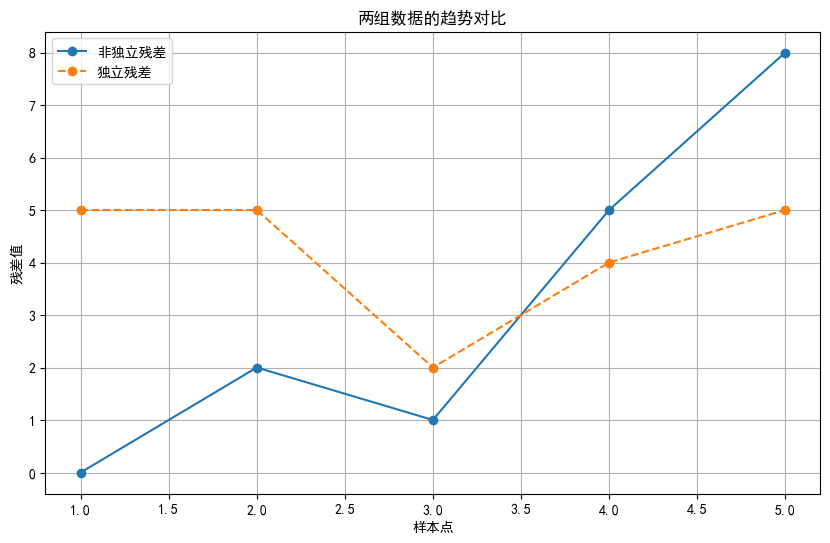

### 非独立样本造成的影响

- 影响一：低估标准误。标准误（standard error）会被低估。导致置信区间变窄，增加假阳性的可能性，即统计显示结果存在显著差异，但实际上没有。
- 影响二：高估统计显著性。p值会变得更小，导致错误地认为变量之间存在显著关系。
- 影响三：模型参数偏差。回归系数等参数估计值会有偏差，导致模型预测不准确。例如，斜率和截距可能不是实际的最佳估计。

### 对比表

| 影响 | 独立样本                               | 不独立样本                           |
|------|----------------------------------------|--------------------------------------|
| 回归系数 \( \beta_1 \) | 5                                      | 5                                    |
| 标准误 \( SE(\beta_1) \) | 0                                      | 2.94                                 |
| p值 | 由于残差为0无法计算，但假设波动时有显著性 | 约为0.09，假设自由度为5-2=3           |

### 解释
1. **标准误**：在独立样本中，标准误为0，这是假设残差完全为0的理想情况。在实际中，有些波动会导致标准误非零，但会比不独立样本的标准误小。不独立样本的标准误更大，反映了样本间的相关性。
2. **p值**：独立样本中假设波动时，p值会显示出显著性；不独立样本中的p值会被低估，可能导致错误地认为变量之间存在显著关系。

通过这些计算和对比，我们可以清楚地看到样本不独立对统计分析结果的影响：标准误增大，p值低估，模型参数估计不准确，从而影响统计推断和决策。

---


### 自变量是连续变量，因变量是连续变量

| 检验方法              | 解释                                                   | 什么时候用                                               |
|-----------------------|--------------------------------------------------------|---------------------------------------------------------|
| 回归残差分析          | 看看预测结果和实际结果之间的误差有没有固定模式。        | 想确认预测误差是随机的，没有规律的。                         |
| Durbin-Watson 检验    | 检查误差之间有没有前后关联，比如时间上的连续性。         | 有时间顺序的数据，想知道误差是不是前后有关联。                |
| 自相关图（ACF, PACF） | 看数据和它之前的数据有没有关联，找出这种关系。             | 研究时间序列数据时，想看当前数据和之前数据之间的关系。         |

### 自变量是连续变量，因变量是类别变量

| 检验方法                     | 解释                                                   | 什么时候用                                               |
|------------------------------|--------------------------------------------------------|---------------------------------------------------------|
| Logistic 回归残差分析        | 看看分类预测的误差是否正常，比如是不是大部分都预测错了。 | 想确保分类预测误差是正常的，没有什么大问题。                |
| Hosmer-Lemeshow 检验         | 检查分类模型整体效果，看它的预测准确性好不好。             | 想知道分类模型的整体预测效果如何，是否准确。                |

### 自变量是类别变量，因变量是连续变量

| 检验方法         | 解释                                                   | 什么时候用                                               |
|------------------|--------------------------------------------------------|---------------------------------------------------------|
| ANOVA（方差分析）| 比较不同组的平均值，看它们有没有明显的差异。              | 想知道不同组之间的平均值是不是有明显不同。                 |
| 残差分析         | 检查模型的误差，看它们是不是符合假设，比如误差是随机的。   | 在做ANOVA之后，检查模型误差是不是正常的。                   |

### 自变量是类别变量，因变量是类别变量

| 检验方法          | 解释                                                   | 什么时候用                                               |
|-------------------|--------------------------------------------------------|---------------------------------------------------------|
| 卡方检验          | 看两个分类变量之间有没有关系，比如性别和购车意向。         | 样本量大时，想知道两个分类变量之间有没有关系。             |
| Fisher精确检验    | 样本量小的情况下，看两个分类变量之间有没有关系。             | 样本量小于20时，检查两个分类变量之间有没有关系。            |


### 1. 自变量是连续变量，因变量是连续变量
1. 回归残差分析
2. Durbin-Watson 检验
3. 自相关图（ACF，PACF）


### 1. 回归残差分析

#### 直觉理解
回归残差分析就是在检查预测结果与实际结果之间的误差（残差）是不是随机的。就像你想知道一个学生的考试成绩是不是因为某个原因波动的，如果发现误差有固定模式（比如持续上升或下降），那说明样本不独立，或者模型可能有问题。

#### 通俗解释
如果残差是随机的，那说明我们的模型很好地解释了数据，没有遗漏重要的信息。如果残差有固定的模式，比如一直在某个范围波动，那说明模型可能有问题。

#### 公式
对于线性回归模型 $Y = \beta_0 + \beta_1 X + \epsilon$：
- $Y$ 是因变量（实际值）
- $\beta_0$ 是截距
- $\beta_1$ 是斜率
- $X$ 是自变量
- $\epsilon$ 是误差项（残差）

我们关注的是 $\epsilon$ 的分布是否随机。

#### 适用情况
- **检查残差是否随机分布**：用来检查回归模型的残差是否随机分布在零线上下。如果残差图中显示出某种模式或趋势，可能表明模型不适用或遗漏了某些自变量。
- **检查残差的正态性**：通过 QQ 图查看残差是否服从正态分布。

#### 使用建议
- 在进行线性回归分析后，常规地检查残差的随机性和正态性。



回归残差分析结果:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                     7356.
Date:                Sun, 09 Jun 2024   Prob (F-statistic):           5.39e-94
Time:                        12:21:26   Log-Likelihood:                 88.744
No. Observations:                 100   AIC:                            -173.5
Df Residuals:                      98   BIC:                            -168.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0222      0.019      1.14

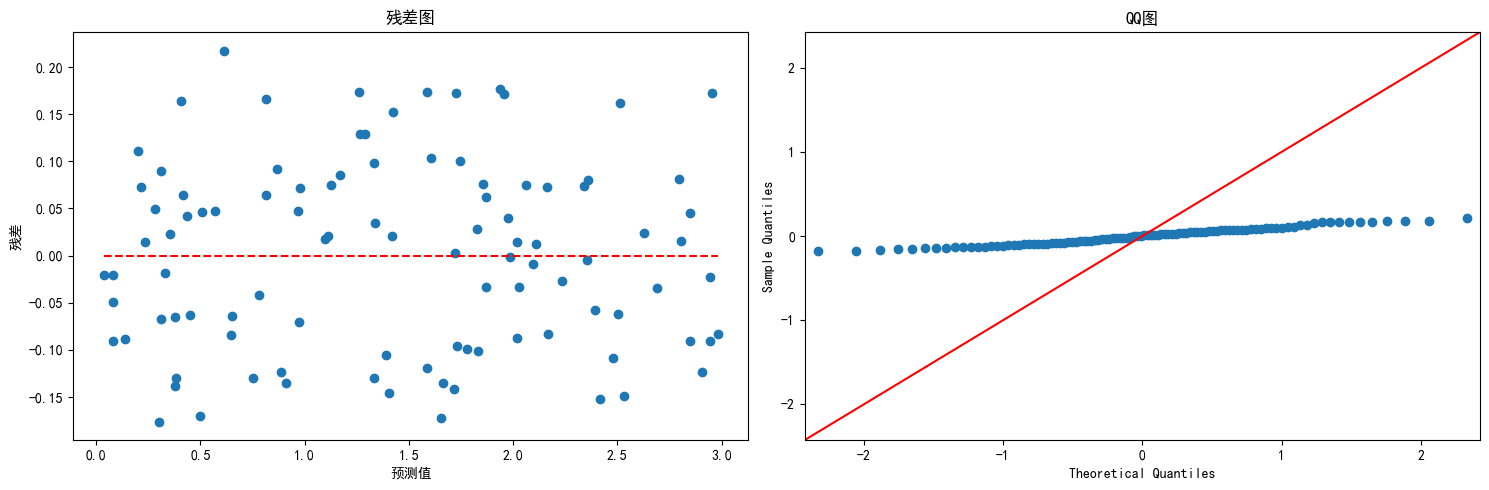

In [22]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from matplotlib import rcParams

# 设置中文字体
rcParams['font.sans-serif'] = ['SimHei']  # 用黑体显示中文
rcParams['axes.unicode_minus'] = False    # 解决保存图像时负号 '-' 显示为方块的问题

# 生成数据
np.random.seed(0)
X = np.random.rand(100)
Y = 3 * X + np.random.normal(0, 0.1, 100)

# 回归分析
X = sm.add_constant(X)  # 添加常数项
model = sm.OLS(Y, X).fit()
predictions = model.predict(X)

# 残差分析
residuals = model.resid

# 打印结果含义和取值范围标准
print("回归残差分析结果:")
print(model.summary())
print("\n残差应随机分布，如果有明显模式，则模型可能不适用。")

# 绘制残差图和QQ图
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# 残差图
axes[0].scatter(predictions, residuals)
axes[0].hlines(y=0, xmin=min(predictions), xmax=max(predictions), colors='r', linestyles='--')
axes[0].set_xlabel('预测值')
axes[0].set_ylabel('残差')
axes[0].set_title('残差图')

# QQ图
sm.qqplot(residuals, line='45', ax=axes[1])
axes[1].set_title('QQ图')

plt.tight_layout()
plt.show()


### 2. Durbin-Watson 检验

#### 直觉理解
Durbin-Watson 检验就像在检查一个人的心跳，如果心跳很有规律，那可能是有问题的。同样地，我们检查回归模型的误差（残差）是不是有规律，如果误差之间有很强的关联，那就可能模型不太好。

#### 通俗解释
Durbin-Watson 统计量范围是 $0$ 到 $4$：
- $2$ 表示没有自相关性（误差之间没有关系）
- 小于 $2$ 表示正相关（误差有正向关联）
- 大于 $2$ 表示负相关（误差有反向关联）

#### 公式
Durbin-Watson 统计量的公式是：
$$
DW = \frac{\sum_{t=2}^n (e_t - e_{t-1})^2}{\sum_{t=1}^n e_t^2}
$$
- $e_t$ 是第 $t$ 个残差
- $n$ 是样本大小

#### 适用情况
- **检测残差的自相关性**：特别是对于时间序列数据，这种检验可以帮助发现残差之间是否存在正相关或负相关。
- **快速评估自相关性**：提供一个简洁的统计量，可以快速判断残差是否存在自相关。

#### 使用建议
- 在时间序列分析或任何可能存在残差自相关的回归分析中使用，以检测残差的自相关性。


Durbin-Watson 检验结果:
Durbin-Watson 统计量: 2.0832252321235343
解释：
0-2之间：正相关（误差值前后有关联）
2：没有自相关（误差值前后没有关联）（注意：接近2即可）
2-4之间：负相关（误差值前后有反向关联）


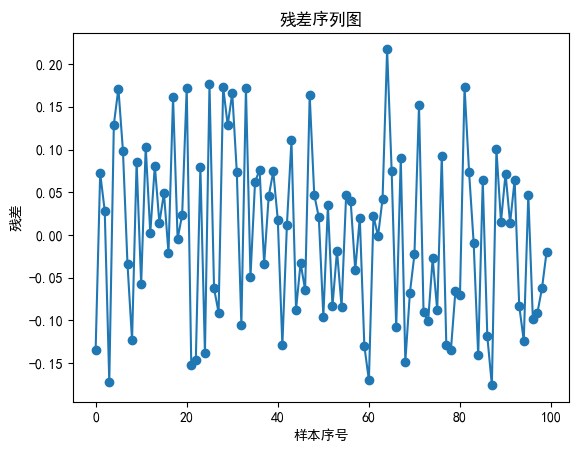

In [23]:
from statsmodels.stats.stattools import durbin_watson

# 计算Durbin-Watson统计量
dw_stat = durbin_watson(residuals)

# 打印结果含义和取值范围标准
print("Durbin-Watson 检验结果:")
print(f"Durbin-Watson 统计量: {dw_stat}")
print("解释：")
print("0-2之间：正相关（误差值前后有关联）")
print("2：没有自相关（误差值前后没有关联）（注意：接近2即可）")
print("2-4之间：负相关（误差值前后有反向关联）")

# 绘制残差序列图
plt.plot(residuals, marker='o')
plt.xlabel('样本序号')
plt.ylabel('残差')
plt.title('残差序列图')
plt.show()



### 3. 自相关图（ACF, PACF）

#### 直觉理解
自相关图（ACF）和偏自相关图（PACF）就像在看一场电影的片段，ACF 看整个电影的片段和过去片段的关系，而 PACF 则看每个片段独立和之前片段的关系。

#### 通俗解释
- ACF（自相关函数）显示数据和之前数据的关系。如果当前数据和之前数据有很强的关联，那么 ACF 的值就很高。
- PACF（偏自相关函数）在排除其他时间点的影响后，看某个特定时间点和当前时间点的关系。

#### 公式
ACF 的计算公式是：
$$
\rho(k) = \frac{\sum_{t=k+1}^n (Y_t - \bar{Y})(Y_{t-k} - \bar{Y})}{\sum_{t=1}^n (Y_t - \bar{Y})^2}
$$
- $k$ 是滞后期
- $Y_t$ 是第 $t$ 个值
- $\bar{Y}$ 是均值

PACF 是通过递归算法计算的，考虑到每个滞后期的独立影响。

#### 适用情况
- **详细查看数据的自相关性**：用于查看时间序列数据在不同滞后期的自相关性（ACF）和在去除其他滞后变量后每个滞后期的自相关性（PACF）。
- **识别时间序列模型的阶数**：帮助确定时间序列模型中需要包含的滞后项。

#### 使用建议
- 在时间序列分析中，尤其是需要构建自回归模型（AR模型）或移动平均模型（MA模型）时，使用这些图来确定模型的阶数。

自相关图（ACF, PACF）:
ACF显示数据在不同滞后期的自相关性，PACF显示去除其他滞后变量后每个滞后期的自相关性。
解释：
ACF：看当前值和之前的值（滞后期）的相关性，通常滞后期越长，相关性越低。
PACF：去除其他滞后期的影响，看特定滞后期的相关性，通常用来识别时间序列模型的阶数。


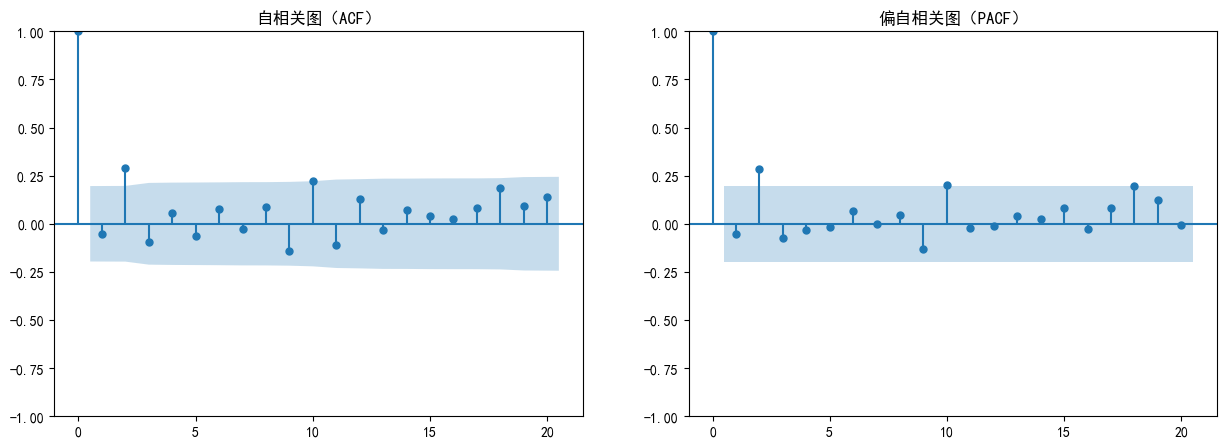

In [18]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# 打印结果含义和取值范围标准
print("自相关图（ACF, PACF）:")
print("ACF显示数据在不同滞后期的自相关性，PACF显示去除其他滞后变量后每个滞后期的自相关性。")
print("解释：")
print("ACF：看当前值和之前的值（滞后期）的相关性，通常滞后期越长，相关性越低。")
print("PACF：去除其他滞后期的影响，看特定滞后期的相关性，通常用来识别时间序列模型的阶数。")

# 绘制自相关图和偏自相关图
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
plot_acf(Y, lags=20, ax=axes[0])
plot_pacf(Y, lags=20, ax=axes[1])
axes[0].set_title('自相关图（ACF）')
axes[1].set_title('偏自相关图（PACF）')
plt.show()


---


### 2. 自变量是连续变量，因变量是类别变量
1. 回归残差分析


In [24]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from statsmodels.graphics.gofplots import qqplot

# 生成示例数据
X, y = make_classification(n_samples=100, n_features=1, random_state=0)
X = sm.add_constant(X)

# 逻辑回归模型
logit_model = sm.Logit(y, X).fit()

# 获取标准化残差
standardized_residuals = logit_model.get_influence().resid_studentized_internal

# 打印模型摘要
print(logit_model.summary())

# 绘制残差图
predicted_probs = logit_model.predict(X)
plt.scatter(predicted_probs, standardized_residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('预测概率')
plt.ylabel('标准化残差')
plt.title('残差图')
plt.show()

# 绘制QQ图
qqplot(standardized_residuals, line='45')
plt.title('QQ图')
plt.show()


ValueError: Number of informative, redundant and repeated features must sum to less than the number of total features


### 3. 自变量是类别变量，因变量是连续变量
我们将使用方差分析（ANOVA）并绘制类别与连续变量的箱线图。



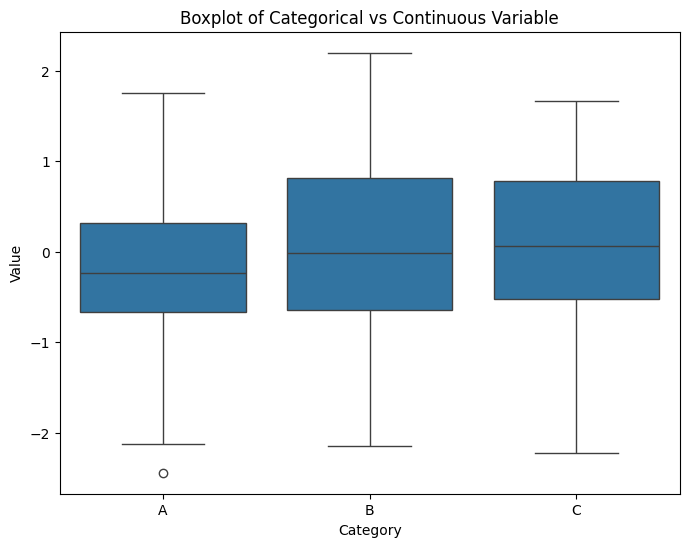

                sum_sq    df         F    PR(>F)
C(category)   1.227675   2.0  0.601918  0.549793
Residual     98.920847  97.0       NaN       NaN
样本数据独立 (接受 H0).


C:\Users\Admin\AppData\Local\Temp\ipykernel_9020\1331166246.py:29: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if anova_table['PR(>F)'][0] < 0.05:


In [17]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols

# 示例数据
np.random.seed(0)
df = pd.DataFrame({
    'category': np.random.choice(['A', 'B', 'C'], size=100),
    'value': np.random.normal(size=100)
})

# 方差分析
model = ols('value ~ C(category)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# 绘制箱线图
plt.figure(figsize=(8, 6))
sns.boxplot(x='category', y='value', data=df)
plt.title('Boxplot of Categorical vs Continuous Variable')
plt.xlabel('Category')
plt.ylabel('Value')
plt.show()

# 打印ANOVA结果
print(anova_table)
if anova_table['PR(>F)'][0] < 0.05:
    result_3 = "样本数据不独立 (拒绝 H0)."
else:
    result_3 = "样本数据独立 (接受 H0)."
print(result_3)



### 4. 自变量是连续变量，因变量是连续变量
我们将使用皮尔森相关系数检验并绘制散点图和回归线。


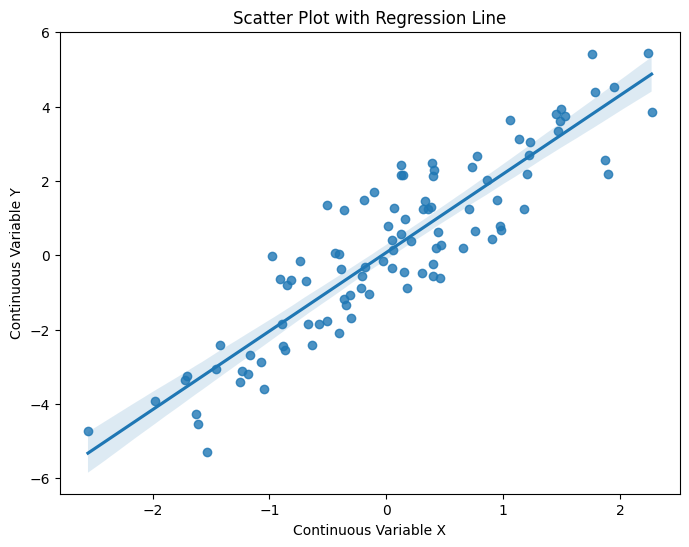

Pearson Correlation Coefficient: 0.9007
p-value: 0.0000
样本数据不独立 (拒绝 H0).


In [16]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# 示例数据
np.random.seed(0)
x = np.random.normal(size=100)
y = 2 * x + np.random.normal(size=100)

# 皮尔森相关系数检验
corr, p_value = pearsonr(x, y)

# 绘制散点图和回归线
plt.figure(figsize=(8, 6))
sns.regplot(x=x, y=y)
plt.title('Scatter Plot with Regression Line')
plt.xlabel('Continuous Variable X')
plt.ylabel('Continuous Variable Y')
plt.show()

# 打印皮尔森相关系数结果
print(f'Pearson Correlation Coefficient: {corr:.4f}')
print(f'p-value: {p_value:.4f}')
if p_value < 0.05:
    result_4 = "样本数据不独立 (拒绝 H0)."
else:
    result_4 = "样本数据独立 (接受 H0)."
print(result_4)


1. 自相关图（ACF图）

适用场景：
- 用于时间序列数据，检测数据点之间的自相关性。
- ACF图显示数据点与其滞后值之间的相关性。

结果解释：
- 在ACF图中，每个条形表示特定滞后值的自相关系数。
- 如果大多数条形都在置信区间（通常以蓝色虚线表示）内，则数据点之间没有显著的自相关性。
- 如果条形在置信区间之外，则表明存在自相关性。

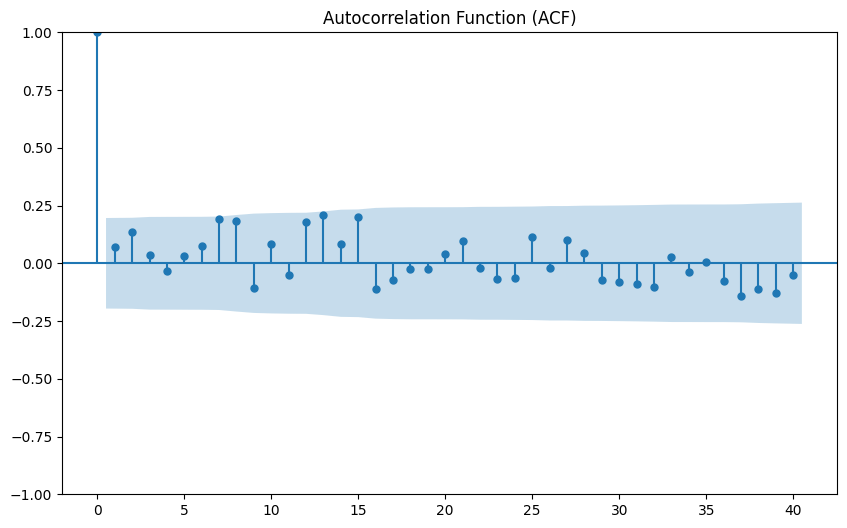

    Lag  ACF Value  Significant
0     0   1.000000         True
1     1   0.071491        False
2     2   0.136645        False
3     3   0.034867        False
4     4  -0.033098        False
5     5   0.029476        False
6     6   0.072955        False
7     7   0.190553        False
8     8   0.181726        False
9     9  -0.109075        False
10   10   0.084378        False
11   11  -0.049725        False
12   12   0.180390        False
13   13   0.210761         True
14   14   0.084600        False
15   15   0.201842         True
16   16  -0.109401        False
17   17  -0.073061        False
18   18  -0.023333        False
19   19  -0.024056        False
20   20   0.039280        False
21   21   0.096082        False
22   22  -0.018685        False
23   23  -0.067748        False
24   24  -0.062183        False
25   25   0.112888        False
26   26  -0.021386        False
27   27   0.101390        False
28   28   0.046648        False
29   29  -0.070317        False
30   30 

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd

# 生成示例数据
np.random.seed(0)
data = np.random.normal(0, 1, 100)

# 绘制自相关图并获取自相关系数
fig, ax = plt.subplots(figsize=(10, 6))
acf_result = sm.tsa.acf(data, nlags=40, fft=True)
sm.graphics.tsa.plot_acf(data, lags=40, ax=ax)
plt.title('Autocorrelation Function (ACF)')
plt.show()

# 打印自相关系数和显著性判断
alpha = 0.05  # 设定显著性水平
confidence_interval = 1.96 / np.sqrt(len(data))  # 95% 置信区间

# 构建结果数据框
lags = np.arange(0, 41)
acf_values = acf_result[:41]
significant = np.abs(acf_values) > confidence_interval

results = pd.DataFrame({'Lag': lags, 'ACF Value': acf_values, 'Significant': significant})

# 打印结果
print(results)

# 解释结果
for lag, acf_val, sig in zip(lags, acf_values, significant):
    if lag == 0:
        continue
    if sig:
        print(f'Lag {lag}: ACF value = {acf_val:.4f}, which is significant (p < {alpha}).')
    else:
        print(f'Lag {lag}: ACF value = {acf_val:.4f}, which is not significant (p >= {alpha}).')


这个自相关图（ACF图）用于检查数据的自相关性。让我们详细解释一下这个图：

### 解释ACF图
- **横轴**（x-axis）：表示滞后（lag）数。滞后数是指在时间序列中当前值与之前的值之间的间隔。例如，滞后为1表示当前值与前一个值之间的关系，滞后为2表示当前值与前两个值之间的关系，依此类推。
- **纵轴**（y-axis）：表示自相关系数（autocorrelation coefficient）。自相关系数的取值范围是 -1 到 1，表示两个值之间的线性相关性。
- **蓝色条**：表示每个滞后数的自相关系数。如果这些条在零附近并且在置信区间（蓝色阴影区域）内，则表明没有显著的自相关。
- **蓝色阴影区域**：表示95%的置信区间。如果自相关系数在这个区域内，表示没有显著的自相关；如果超出这个区域，表示存在显著的自相关。


---

2. Durbin-Watson统计量

适用场景：
- 用于回归分析，检测回归残差（误差项）中的自相关性。
- 特别适用于时间序列数据的回归模型。

结果解释：
- Durbin-Watson统计量的取值范围为0到4。
- 值接近2表明残差没有自相关性。
- 值小于1.5表明存在正自相关。
- 值大于2.5表明存在负自相关。

In [10]:
from statsmodels.stats.stattools import durbin_watson

# 生成回归残差示例数据
residuals = np.random.normal(0, 1, 100)

# 计算Durbin-Watson统计量
dw_stat = durbin_watson(residuals)
print(f'Durbin-Watson Statistic: {dw_stat:.4f}')

# 解释结果
if dw_stat < 1.5:
    result = "数据点之间存在显著的正自相关，数据点不独立"
elif dw_stat > 2.5:
    result = "数据点之间存在显著的负自相关，数据点不独立"
else:
    result = "数据点之间没有显著的自相关，数据点独立。"

print(result)


Durbin-Watson Statistic: 1.9451
数据点之间没有显著的自相关，数据点独立。


---

3. 卡方检验

适用场景：
- 用于分类数据，检测两个分类变量之间的独立性。
- 通常用于列联表数据，检验观察到的频数是否与期望频数有显著差异。

结果解释：
- 计算的卡方统计量与临界值比较，或通过p值判断。
- p值小于显著性水平（如0.05），拒绝原假设，认为变量之间存在关联（不独立）。
- p值大于显著性水平，无法拒绝原假设，认为变量之间独立。

In [12]:
from scipy.stats import chi2_contingency

# 生成示例数据
observed = np.array([[10, 10, 20], [20, 20, 20], [30, 20, 20]])

# 计算卡方检验统计量
chi2, p, dof, expected = chi2_contingency(observed)
print(f'Chi-Square Statistic: {chi2:.4f}')
print(f'p-value: {p:.4f}')

# 解释结果
alpha = 0.05
if p < alpha:
    result = "p值小于0.05，表示拒绝独立性假设，样本不独立。"
else:
    result = "p值大于0.05，表示无法拒绝独立性假设，样本独立。"

print(result)


Chi-Square Statistic: 6.4087
p-value: 0.1706
p值大于0.05，表示无法拒绝独立性假设，样本独立。


---


5. **处理非独立数据**：
   - **时间序列分析**：如ARIMA模型，可以处理时间相关的数据。
   - **混合效应模型**：可以处理群体效应的数据。
   - **Bootstrap方法**：一种非参数统计方法，通过重采样来估计统计量的分布，可以部分缓解数据相关性带来的问题。

### 实例
假设你在研究某个药物对血压的影响，收集了一组病人的血压数据。如果这些病人之间没有任何关系（例如，他们来自不同的家庭、地区），那么你可以假设这些数据是独立的。但是，如果这些病人来自同一个家庭，可能存在家庭遗传因素导致的血压相关性，这时数据就不是独立的。

理解和验证样本数据的独立性对于正确应用统计方法和获得可靠的结论至关重要。在进行数据分析时，应该始终检查并考虑数据的独立性，并在必要时采取相应的处理措施。

---

## 二、数据方差同质：变量或群组间分散程度接近；用同质性检验

**数据方差同质性**（Homogeneity of Variance），又称为**方差齐性**，是指不同样本组或变量之间的方差相等或接近。这是许多统计分析方法（如t检验、ANOVA等）的基本假设之一。如果方差齐性假设被违反，可能会导致统计检验结果的不准确。

### 方差同质性的关键点：

1. **定义**：
   - 方差同质性意味着不同组或不同水平的独立变量之间的方差相等。例如，在ANOVA中，方差齐性假设所有组的方差相等。

2. **重要性**：
   - **统计方法的基础**：许多经典统计方法（如ANOVA和线性回归）假设方差齐性。如果这个假设被违反，检验的显著性水平和结果的可靠性可能受到影响。
   - **结果解释的准确性**：方差齐性保证了在各组之间进行比较时，每组的变异程度相似，这有助于更准确地解释和比较结果。

3. **检测方差同质性的方法**：
   - **Levene's Test（莱文检验）**：测试不同组的方差是否相等。它对数据的正态性要求较低，是一种常用的方差同质性检验方法。
   - **Bartlett's Test（巴特利特检验）**：测试不同组的方差是否相等，但对数据的正态性要求较高。
   - **Hartley's F-max Test**：比较组间最大方差与最小方差的比值，用于小样本数据。
   - **图示法**：如残差图，通过直观的方式观察不同组的方差分布。

4. **处理方差齐性假设被违反的方法**：
   - **方差稳定化变换**：如对数变换、平方根变换等，可以使数据方差变得更均匀。
   - **使用稳健的统计方法**：如Welch's ANOVA，在方差不齐时也能提供较为可靠的结果。
   - **非参数检验**：如Kruskal-Wallis检验，不依赖方差齐性假设。

### 实例
假设你在研究不同教学方法对学生成绩的影响，收集了使用不同教学方法的三个班级的学生成绩。如果这三个班级的成绩方差相似，即分散程度相近，那么可以认为数据满足方差齐性假设，可以使用ANOVA进行分析。

---

In [42]:
import numpy as np
import scipy.stats as stats

# 生成三个不同组的数据
group1 = np.random.normal(70, 10, 50)
group2 = np.random.normal(75, 12, 50)
group3 = np.random.normal(72, 15, 50)

# Levene's Test
stat, p_value = stats.levene(group1, group2, group3)

print(f"Levene's test statistic: {stat:.4f}, p-value: {p_value:.4f}")

# 解释结果
alpha = 0.05
if p_value > alpha:
    print('Fail to reject the null hypothesis - variances are equal (homogeneity of variance).')
else:
    print('Reject the null hypothesis - variances are not equal (heterogeneity of variance).')

Levene's test statistic: 8.1285, p-value: 0.0004
Reject the null hypothesis - variances are not equal (heterogeneity of variance).


---

## 三、数据正态分布：符合钟型图；用峰度和偏度检验

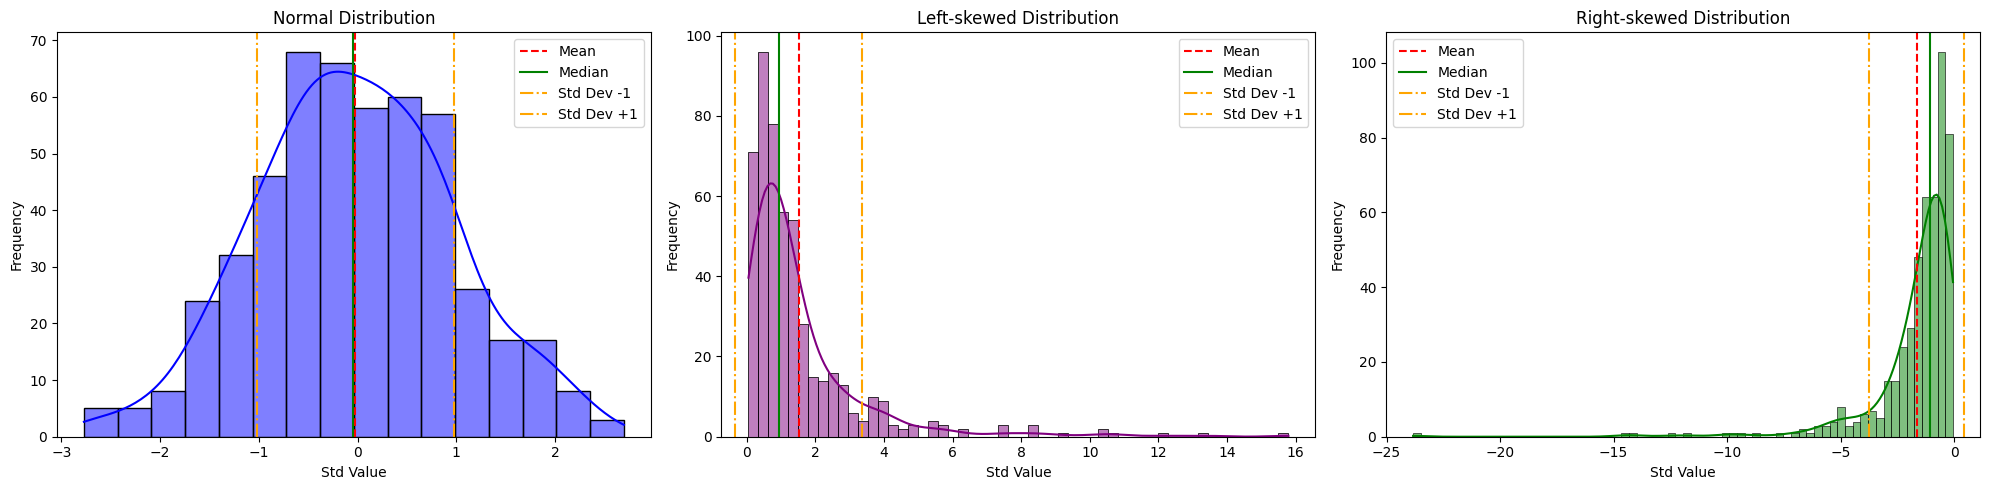

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Generate data
np.random.seed(0)
data_normal = np.random.normal(loc=0, scale=1, size=500)
data_left_skewed = np.random.lognormal(mean=0, sigma=1, size=500)
data_right_skewed = -np.random.lognormal(mean=0, sigma=1, size=500)

# Plotting
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

# normal distribution
sns.histplot(data_normal, kde=True, ax=axes[0], color='blue')
axes[0].axvline(np.mean(data_normal), color='red', linestyle='--', label='Mean')
axes[0].axvline(np.median(data_normal), color='green', linestyle='-', label='Median')
axes[0].axvline(np.mean(data_normal) - np.std(data_normal), color='orange', linestyle='-.', label='Std Dev -1')
axes[0].axvline(np.mean(data_normal) + np.std(data_normal), color='orange', linestyle='-.', label='Std Dev +1')
axes[0].set_title('Normal Distribution')
axes[0].set_xlabel('Std Value')
axes[0].set_ylabel('Frequency')
axes[0].legend()

# Left-skewed distribution
sns.histplot(data_left_skewed, kde=True, ax=axes[1], color='purple')
axes[1].axvline(np.mean(data_left_skewed), color='red', linestyle='--', label='Mean')
axes[1].axvline(np.median(data_left_skewed), color='green', linestyle='-', label='Median')
axes[1].axvline(np.mean(data_left_skewed) - np.std(data_left_skewed), color='orange', linestyle='-.', label='Std Dev -1')
axes[1].axvline(np.mean(data_left_skewed) + np.std(data_left_skewed), color='orange', linestyle='-.', label='Std Dev +1')
axes[1].set_title('Left-skewed Distribution')
axes[1].set_xlabel('Std Value')
axes[1].set_ylabel('Frequency')
axes[1].legend()

# Right-skewed distribution
sns.histplot(data_right_skewed, kde=True, ax=axes[2], color='green')
axes[2].axvline(np.mean(data_right_skewed), color='red', linestyle='--', label='Mean')
axes[2].axvline(np.median(data_right_skewed), color='green', linestyle='-', label='Median')
axes[2].axvline(np.mean(data_right_skewed) - np.std(data_right_skewed), color='orange', linestyle='-.', label='Std Dev -1')
axes[2].axvline(np.mean(data_right_skewed) + np.std(data_right_skewed), color='orange', linestyle='-.', label='Std Dev +1')
axes[2].set_title('Right-skewed Distribution')
axes[2].set_xlabel('Std Value')
axes[2].set_ylabel('Frequency')
axes[2].legend()

plt.tight_layout()
plt.show()


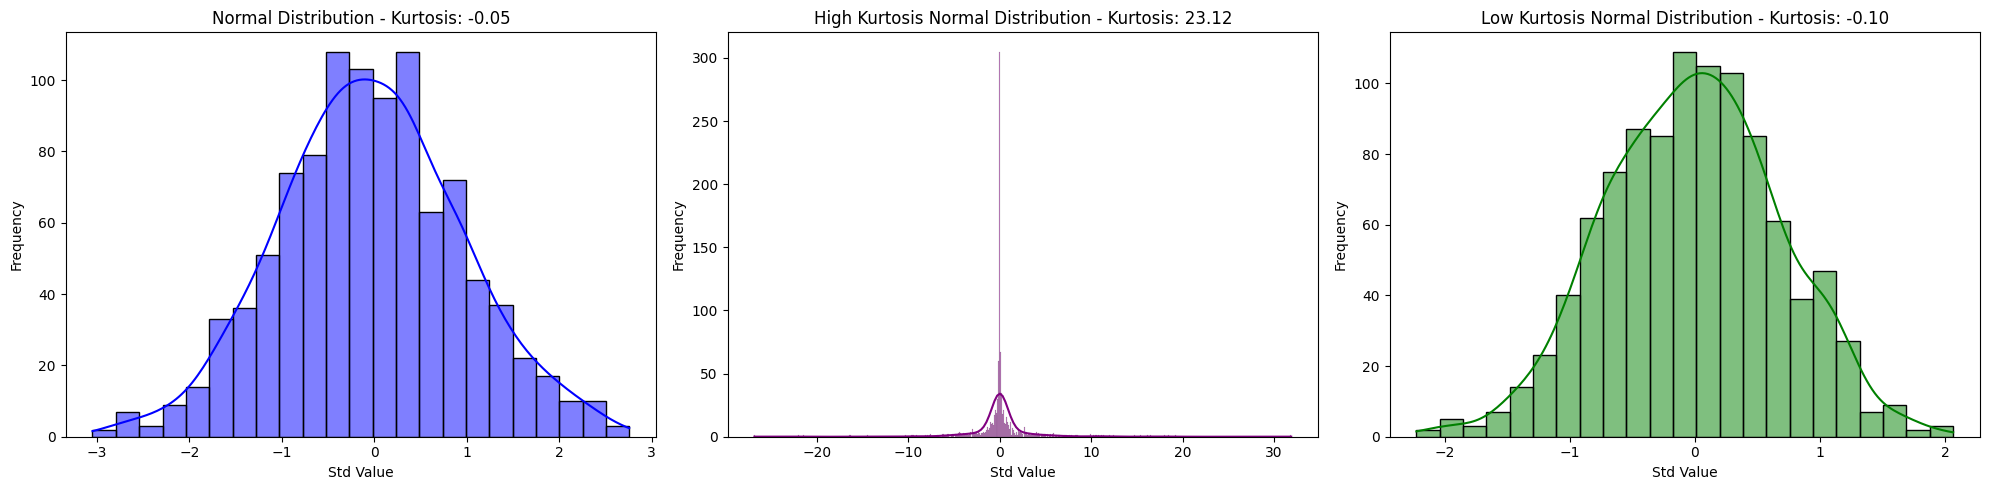

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kurtosis

# Generate normal distribution data
np.random.seed(0)
data_normal = np.random.normal(loc=0, scale=1, size=1000)

# Generate data with different kurtosis based on standard normal distribution
data_high_kurtosis_normal = np.random.normal(loc=0, scale=1, size=1000) ** 3  # Increase kurtosis by cubing the data
data_low_kurtosis_normal = (np.random.normal(loc=0, scale=1, size=1000) - np.random.normal(loc=0, scale=1, size=1000)) / 2  # Decrease kurtosis

# Calculate kurtosis for new data
kurt_normal = kurtosis(data_normal)
kurt_high_normal = kurtosis(data_high_kurtosis_normal)
kurt_low_normal = kurtosis(data_low_kurtosis_normal)

# Plotting
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

# Normal distribution
sns.histplot(data_normal, kde=True, ax=axes[0], color='blue')
axes[0].set_title(f'Normal Distribution - Kurtosis: {kurt_normal:.2f}')
axes[0].set_xlabel('Std Value')
axes[0].set_ylabel('Frequency')

# High kurtosis normal distribution
sns.histplot(data_high_kurtosis_normal, kde=True, ax=axes[1], color='purple')
axes[1].set_title(f'High Kurtosis Normal Distribution - Kurtosis: {kurt_high_normal:.2f}')
axes[1].set_xlabel('Std Value')
axes[1].set_ylabel('Frequency')

# Low kurtosis normal distribution
sns.histplot(data_low_kurtosis_normal, kde=True, ax=axes[2], color='green')
axes[2].set_title(f'Low Kurtosis Normal Distribution - Kurtosis: {kurt_low_normal:.2f}')
axes[2].set_xlabel('Std Value')
axes[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


---

## 正态性检验的标准

| **指标** | **分类** | **描述** |
| --- | --- | --- |
| **偏度（Skewness）** | 数据分布的不对称性 | |
| **严重偏斜分布** | 1 < 偏度系数 或 偏度系数 < -1 | |
| **中度偏斜分布** | 0.5 < 偏度系数 < 1 或 -1 < 偏度系数 < -0.5 | |
| **轻微偏斜分布** | 0 < 偏度系数 < 0.5 或 -0.5 < 偏度系数 < 0 | |
| **负值** | 左偏分布（左长尾） | |
| **正值** | 右偏分布（右长尾） | |
| **峰度（Kurtosis）** | 数据分布的峰值高低 | |
| **非正态分布参考值** | 偏度 > 1；峰度 > 7 | |
| **标准正态分布** | 偏度 = 0；峰度 = 0 | |

---


### 偏度（Skewness）

偏度衡量的是数据分布偏离对称中心（均值）的程度。通过偏度公式，我们可以了解数据是向左偏（负偏）还是向右偏（正偏），以及这种偏斜的程度。

#### 偏度公式：
样本偏度的公式为：
$$
\text{Skewness} = \frac{n}{(n-1)(n-2)} \sum_{i=1}^{n} \left( \frac{x_i - \bar{x}}{s} \right)^3
$$

- $n$：样本数量
- $x_i$：第 $i$ 个样本值
- $\bar{x}$：样本均值
- $s$：样本标准差

简化的公式（使用统计软件）为：
$$
\text{Skewness} = \frac{1}{n} \sum_{i=1}^{n} \left( \frac{x_i - \bar{x}}{s} \right)^3
$$

---


### 峰度（Kurtosis）
峰度度量分布的尖峰程度。正峰度表示分布比正态分布尖锐，负峰度表示分布比正态分布平坦。

#### 峰度公式：
样本峰度的公式为：
$$
\text{Kurtosis} = \frac{n(n+1)}{(n-1)(n-2)(n-3)} \sum_{i=1}^{n} \left( \frac{x_i - \bar{x}}{s} \right)^4 - \frac{3(n-1)^2}{(n-2)(n-3)}
$$

- $n$：样本数量
- $x_i$：第 $i$ 个样本值
- $\bar{x}$：样本均值
- $s$：样本标准差

简化的公式（使用统计软件）为：
$$
\text{Kurtosis} = \frac{1}{n} \sum_{i=1}^{n} \left( \frac{x_i - \bar{x}}{s} \right)^4 - 3
$$

---

### 主要步骤：
1. **计算均值  $ \bar{x} $**：计算均值，用于计算偏差。
2. **去均值化  $ {x_i} - \bar{x} $**（中心化）：将数据整体平移，使均值变为0，以便观察每个数据点相对于均值的偏差。
3. **标准化（Z分数） $z_i = \frac{x_i - \bar{x}}{s} $**：将偏差除以标准差，使数据在相同尺度下进行比较，消除单位和量纲的影响。
4. **立方保留符号，扩大观测效果 $(\frac{x_i - \bar{x}}{s})^3$**：计算偏差的三次方，保留正负号，并放大偏差，便于观察分布的偏斜方向和程度。
5. **求标准化后的平均 $\frac{1}{n} \sum_{i=1}^{n} \left( \frac{x_i - \bar{x}}{s} \right)^3$**：计算所有标准化偏差三次方的平均值，以反映整体分布的偏斜程度。


---

# 举例

假设我们有以下数据集：
$$ 6, 8, 10, 12, 14 $$



### 1. **计算均值  $ \bar{x} $**：计算均值，用于计算偏差。

$$
\bar{x} = \frac{1}{n} \sum_{i=1}^{n} x_i
$$

**参数：**
- $ \bar{x} $: 均值
- $ n $: 数据点的数量
- $ x_i $: 第 $ i $ 个数据点
- $ n $: 数据点的数量

$$ \bar{x} = \frac{6 + 8 + 10 + 12 + 14}{5} = 10 $$


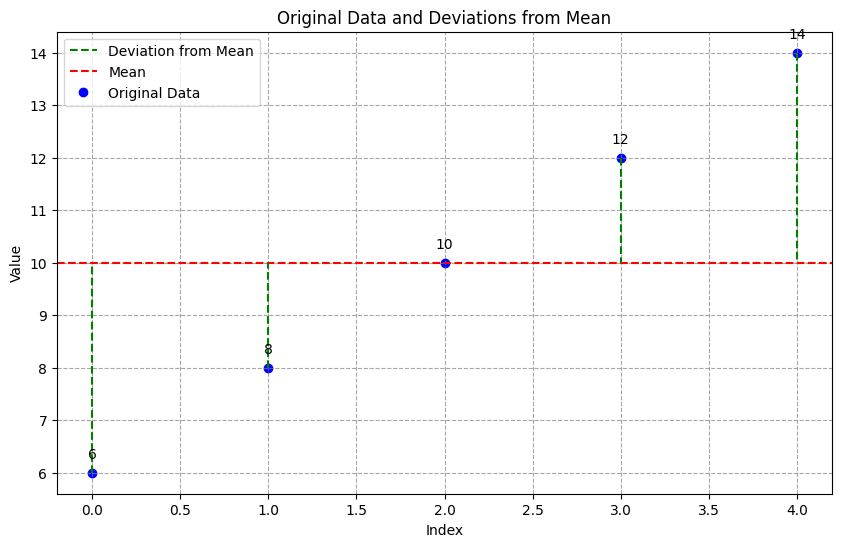

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 原始数据
data = [6, 8, 10, 12, 14]
mean = sum(data) / len(data)

# 绘制原始数据的散点图和偏差线
fig, ax = plt.subplots(figsize=(10, 6))

# 原始数据点
ax.scatter(range(len(data)), data, color='blue', label='Original Data')
for i, txt in enumerate(data):
    ax.annotate(txt, (i, data[i]), textcoords="offset points", xytext=(0,10), ha='center')

# 均值线
ax.axhline(mean, color='red', linestyle='--', label='Mean')

# 每个点到均值的距离（偏差）
for i in range(len(data)):
    ax.plot([i, i], [data[i], mean], color='green', linestyle='--')

# 添加绿色虚线标记
import matplotlib.lines as mlines
green_line = mlines.Line2D([], [], color='green', linestyle='--', label='Deviation from Mean')
ax.legend(handles=[green_line, mlines.Line2D([], [], color='red', linestyle='--', label='Mean'), 
                   mlines.Line2D([], [], color='blue', marker='o', linestyle='none', label='Original Data')])

ax.set_title('Original Data and Deviations from Mean')
ax.set_xlabel('Index')
ax.set_ylabel('Value')

ax.grid(True, linestyle='--', color='grey', alpha=0.7)

plt.show()


---


### 标准差公式 (Standard Deviation Formula)
对于样本数据（Sample Standard Deviation）：
$$
s = \sqrt{\frac{1}{n-1} \sum_{i=1}^{n} (x_i - \bar{x})^2}
$$

**参数：**
- $ s $: 样本标准差
- $ x_i $: 第 $ i $ 个数据点
- $ \bar{x} $: 样本均值
- $ n $: 数据点的数量

对于总体数据（Population Standard Deviation）：
$$
\sigma = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (x_i - \mu)^2}
$$

**参数：**
- $ \sigma $: 总体标准差
- $ \bar{x} $: 样本均值
- $ \mu $: 总体均值
- $ n $: 数据点的数量


### 2. **去均值化  $ {x_i} - \bar{x} $**（中心化）：将数据整体平移，使均值变为0，以便观察每个数据点相对于均值的偏差。

$$
s = \sqrt{\frac{1}{n-1} \sum_{i=1}^{n} (x_i - \bar{x})^2}
$$

**参数：**
- $ s $: 样本标准差
- $ x_i $: 第 $ i $ 个数据点
- $ \bar{x} $: 样本均值
- $ n $: 数据点的数量

$$ s = \sqrt{\frac{(6-10)^2 + (8-10)^2 + (10-10)^2 + (12-10)^2 + (14-10)^2}{5 - 1}} = 3.16 $$

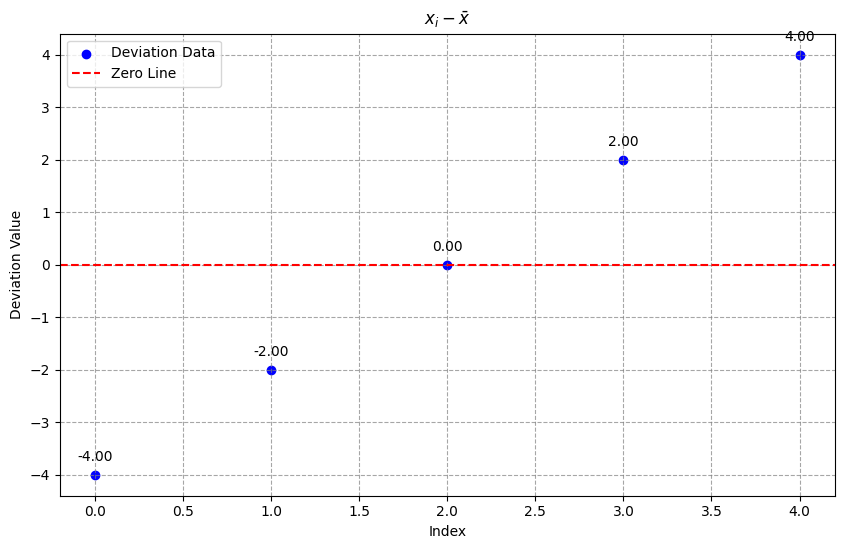

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# 原始数据
data = [6, 8, 10, 12, 14]
mean = sum(data) / len(data)

# 每个值减去均值后的数据
deviation_data = [x - mean for x in data]

# 绘制新数据的散点图和零线
fig, ax = plt.subplots(figsize=(10, 6))

# 新数据点
ax.scatter(range(len(deviation_data)), deviation_data, color='blue', label='Deviation Data')
for i, txt in enumerate(deviation_data):
    ax.annotate(f'{txt:.2f}', (i, deviation_data[i]), textcoords="offset points", xytext=(0,10), ha='center')

# 零线
ax.axhline(0, color='red', linestyle='--', label='Zero Line')

# 添加图例
ax.legend()

ax.set_title(r'$ x_i - \bar{x} $')
ax.set_xlabel('Index')
ax.set_ylabel('Deviation Value')

ax.grid(True, linestyle='--', color='grey', alpha=0.7)

plt.show()


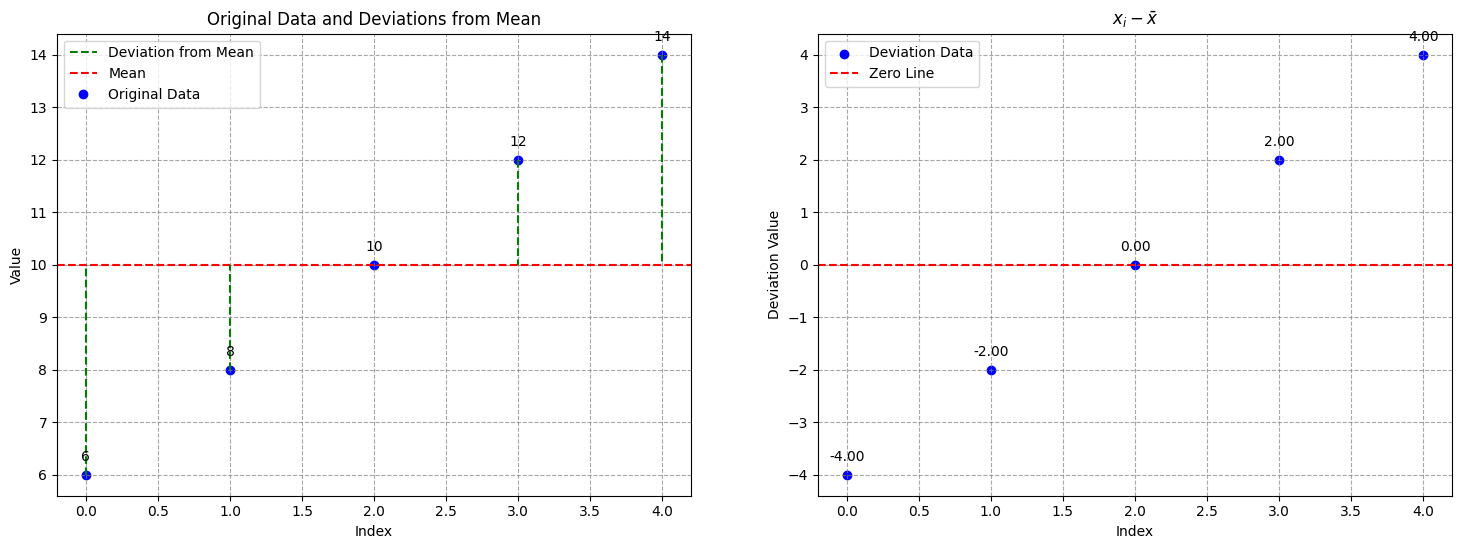

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

# 原始数据
data = [6, 8, 10, 12, 14]
mean = sum(data) / len(data)

# 每个值减去均值后的数据
deviation_data = [x - mean for x in data]

# 创建子图
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

# 绘制原始数据的散点图和偏差线
# 原始数据点
ax1.scatter(range(len(data)), data, color='blue', label='Original Data')
for i, txt in enumerate(data):
    ax1.annotate(txt, (i, data[i]), textcoords="offset points", xytext=(0,10), ha='center')

# 均值线
ax1.axhline(mean, color='red', linestyle='--', label='Mean')

# 每个点到均值的距离（偏差）
for i in range(len(data)):
    ax1.plot([i, i], [data[i], mean], color='green', linestyle='--')

# 添加绿色虚线标记
green_line = mlines.Line2D([], [], color='green', linestyle='--', label='Deviation from Mean')
ax1.legend(handles=[green_line, mlines.Line2D([], [], color='red', linestyle='--', label='Mean'), 
                    mlines.Line2D([], [], color='blue', marker='o', linestyle='none', label='Original Data')])

ax1.set_title('Original Data and Deviations from Mean')
ax1.set_xlabel('Index')
ax1.set_ylabel('Value')
ax1.grid(True, linestyle='--', color='grey', alpha=0.7)

# 绘制新数据的散点图和零线
# 新数据点
ax2.scatter(range(len(deviation_data)), deviation_data, color='blue', label='Deviation Data')
for i, txt in enumerate(deviation_data):
    ax2.annotate(f'{txt:.2f}', (i, deviation_data[i]), textcoords="offset points", xytext=(0,10), ha='center')

# 零线
ax2.axhline(0, color='red', linestyle='--', label='Zero Line')

# 添加图例
ax2.legend()

ax2.set_title(r'$ x_i - \bar{x} $')
ax2.set_xlabel('Index')
ax2.set_ylabel('Deviation Value')
ax2.grid(True, linestyle='--', color='grey', alpha=0.7)

plt.show()


$$
s = \sqrt{\frac{1}{n-1} \sum_{i=1}^{n} (x_i - \bar{x})^2}
$$

**参数：**
- $ s $: 样本标准差
- $ x_i $: 第 $ i $ 个数据点
- $ \bar{x} $: 样本均值
- $ n $: 数据点的数量

$$ s = \sqrt{\frac{(6-10)^2 + (8-10)^2 + (10-10)^2 + (12-10)^2 + (14-10)^2}{5 - 1}} = 3.16 $$

### 标准化的步骤

- 至此，我们学会了使用去均值化将数据平移至以0为中心位置。
- 随后，将其平方以消除正负号的影响。
- 除以自由度以实现无偏估计。
- 最后，开根号以还原数据。
- 得到标准差。即，每个点消除正负号后，每个数据离中心点的平均距离。


### 为什么样本标准差要-1？
- 因为参数估计需要独立样本。
- 根据贝塞尔校正（减1）提供了一个让样本标准差更贴近总体标准差的方法。
- 因为，样本数据中只有n-1个数据是独立的，即 $自由度 = n - 1$

- 如果是总体的话，那么每个样本都是独立的，那么自由度就是n。
- 如果是抽样的话，那么前 $ n-1 $ 个数据点与均值的差值确认以后，第 $ n $ 个数据点的差值是可以确定的。因为所有这些差值的总和必须为0。这是因为均值是所有数据点的平均值。
- 因此，样本标准差的独立样本就是$ n-1 $个。


### 自由度的粗暴解释：

给你一百块钱去帮我买3个菜，我要个红烧肉38，剩下的你随意。一共3个数据，我固定了1个，剩下的2个菜你随便点。因此，n-1 = 3-1，即，自由度是2。

## 案例

用具体的数据和步骤来展示为什么只有 $ n-1 $ 个数据点是独立的。

### 总体数据

假设我们有一个总体数据：

$$ \{150, 152, 155, 158, 160, 162, 165, 168, 170, 172\} $$

我们首先计算总体的均值和标准差：

- **总体均值（\(\mu\)）**：

$$ \mu = \frac{150 + 152 + 155 + 158 + 160 + 162 + 165 + 168 + 170 + 172}{10} = 161.2 $$

- **总体标准差（\(\sigma\)）**：

$$ \sigma = \sqrt{\frac{(150-161.2)^2 + (152-161.2)^2 + (155-161.2)^2 + (158-161.2)^2 + (160-161.2)^2 + (162-161.2)^2 + (165-161.2)^2 + (168-161.2)^2 + (170-161.2)^2 + (172-161.2)^2}{10}} \approx 7.18 $$

### 样本数据

假设我们有以下 5 个数据点作为样本：

$$ \{152, 158, 160, 168, 170\} $$

### 步骤

1. **计算样本均值**：

首先，我们计算样本均值（$\bar{x}$）：

$$ \bar{x} = \frac{152 + 158 + 160 + 168 + 170}{5} = 161.6 $$

2. **计算每个数据点与均值的差值**：

接下来，我们计算每个数据点与均值的差值：

$$ 152 - 161.6 = -9.6 $$
$$ 158 - 161.6 = -3.6 $$
$$ 160 - 161.6 = -1.6 $$
$$ 168 - 161.6 = 6.4 $$
$$ 170 - 161.6 = 8.4 $$

3. **自由度解释**：

如果你已经知道了前 $ n-1 $ 个数据点与均值的差值，那么第 $ n $ 个数据点的差值是可以确定的，因为所有这些差值的总和必须为0。这是因为均值是所有数据点的平均值。

让我们验证一下：

$$ (-9.6) + (-3.6) + (-1.6) + 6.4 + 8.4 = 0 $$

如你所见，前 $ n-1 $ 个差值的总和已经确定了最后一个差值。这就是为什么在计算样本方差和标准差时，只有 $ n-1 $ 个数据点是独立的。

### 直观展示

如果我们假设知道前 $ n-1 $ 个数据点的差值：

- 假设我们知道前 4 个数据点的差值：
  $$ -9.6, -3.6, -1.6, 6.4 $$

- 那么，第 5 个数据点的差值必须是：
  $$ 8.4 $$
  
因为所有这些差值的总和必须为 0。这意味着最后一个数据点的差值是可以通过前 $ n-1 $ 个数据点的差值计算出来的，它不是独立的。

### 最后计算标准差

- **不减1的情况下**（除以 $ n $）：$$ s = \sqrt{\frac{(-9.6)^2 + (-3.6)^2 + (-1.6)^2 + (6.4)^2 + (8.4)^2}{5}} = 6.56 $$

- **减1的情况下**（除以 $ n-1 $）：$$ s = \sqrt{\frac{(-9.6)^2 + (-3.6)^2 + (-1.6)^2 + (6.4)^2 + (8.4)^2}{4}} = 7.34 $$

### 对比分析

- **总体标准差**：7.18
- **不减1的样本标准差**：6.56
- **减1的样本标准差**：7.34

通过对比可以看到，**减1的样本标准差（7.34）** 更接近于 **总体标准差（7.18）**，而 **不减1的样本标准差（6.56）** 明显低估了总体的变异程度。

### 结论

减1后得到的样本标准差更接近总体标准差，因为它修正了由于使用样本均值导致的低估偏差。通过对比具体数据，可以清楚地看到这种修正的效果，使得样本标准差更准确地反映了总体的真实变异程度。这就是为什么在计算样本标准差时，减1可以提供更准确的估计。

---

### 3. **标准化（Z分数） $ z_i = \frac{x_i - \bar{x}}{s} $**：将偏差除以标准差，使数据在相同尺度下进行比较，消除单位和量纲的影响。

   $$ \frac{x_i - \bar{x}}{s} $$

- 将每个中心化后的数据点除以样本标准差 \( s \)，这一步是为了将不同数据集的偏度进行可比性。标准化后，数据点的单位变为标准差单位，这样不同的数据集可以用同样的尺度来衡量其偏离程度。
- 标准化的目的是将数据转换到一个通用尺度（均值为0，标准差为1）

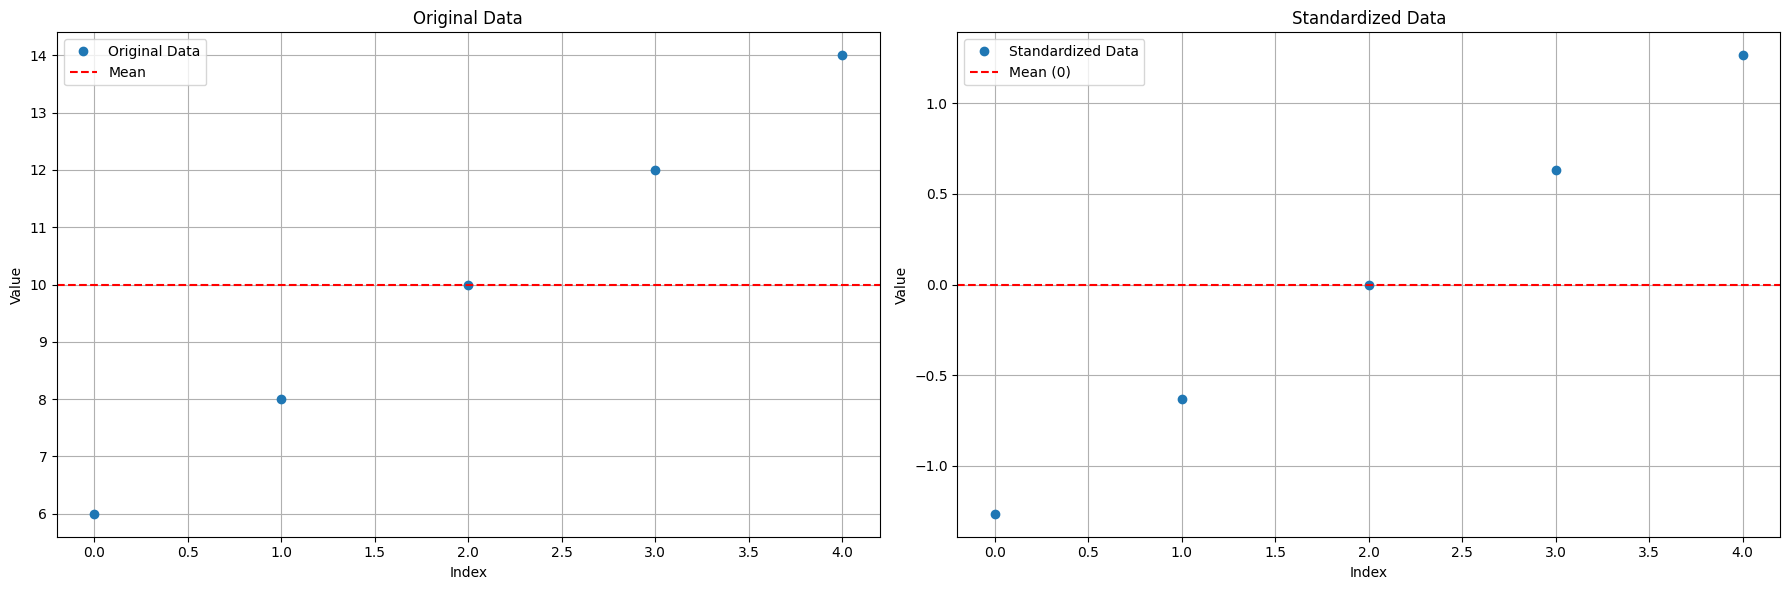

In [19]:
import matplotlib.pyplot as plt
import numpy as np

# 给定数据
data = [6, 8, 10, 12, 14]

# 计算均值和标准差
mean = np.mean(data)
std_dev = np.std(data, ddof=1)  # 样本标准差，ddof=1

# 标准化数据（z-scores）
standardized_data = [(x - mean) / std_dev for x in data]

# 创建子图
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

# 原始数据图
ax1.plot(data, 'o', label='Original Data')
ax1.axhline(y=mean, color='r', linestyle='--', label='Mean')
ax1.set_title('Original Data')
ax1.legend()

# 标准化数据图
ax2.plot(standardized_data, 'o', label='Standardized Data')
ax2.axhline(y=0, color='r', linestyle='--', label='Mean (0)')
ax2.set_title('Standardized Data')
ax2.legend()

# 添加标签和网格
for ax in (ax1, ax2):
    ax.set_xlabel('Index')
    ax.set_ylabel('Value')
    ax.grid(True)

plt.tight_layout()
plt.show()


### 4. **立方保留符号，扩大观测效果 $(\frac{x_i - \bar{x}}{s})^3$**：计算偏差的三次方，保留正负号，并放大偏差，便于观察分布的偏斜方向和程度。

$$ ( \frac{x_i - \bar{x}}{s} )^3 $$

如果在计算偏度时不对每个标准化后的差值进行立方，会导致无法正确捕捉和反映数据分布的不对称性。具体来说，不进行立方会导致以下问题：

### 问题分析

1. **对称性无法区分**：
   - 数据分布的对称性无法正确反映。例如，正偏差和负偏差会相互抵消，使得计算结果无法显示数据的真实偏斜程度。

2. **偏差方向无法区分**：
   - 无法区分左偏和右偏的数据分布。偏度的符号（正负）是通过立方运算得到的，没有立方运算，偏度的正负将不再能指示数据分布的方向（左偏或右偏）。

### 具体例子

假设我们有一个简单的数据集：

$$ \{2, 3, 4, 5, 20\} $$

计算步骤如下：

1. **计算均值 \(\bar{x}\)**：

$$ \bar{x} = \frac{2 + 3 + 4 + 5 + 20}{5} = 6.8 $$

2. **计算样本标准差 \( s \)**：

$$ s = \sqrt{\frac{(2-6.8)^2 + (3-6.8)^2 + (4-6.8)^2 + (5-6.8)^2 + (20-6.8)^2}{5-1}} = \sqrt{\frac{(4.8)^2 + (3.8)^2 + (2.8)^2 + (1.8)^2 + (13.2)^2}{4}} = \sqrt{49.7} \approx 7.05 $$

3. **计算每个数据点减去均值并除以标准差**：

$$ \frac{2-6.8}{7.05} \approx -0.68 $$
$$ \frac{3-6.8}{7.05} \approx -0.54 $$
$$ \frac{4-6.8}{7.05} \approx -0.40 $$
$$ \frac{5-6.8}{7.05} \approx -0.26 $$
$$ \frac{20-6.8}{7.05} \approx 1.87 $$

### 不立方的计算
4. **不进行立方运算，直接求平均值**：

$$ \text{Not Cubed} = \frac{1}{5} \left( -0.68 + (-0.54) + (-0.40) + (-0.26) + 1.87 \right) = \frac{1}{5} (0) = 0 $$

结果为0，这表明数据是对称的，但实际上数据并不对称。20是一个极端值，导致数据的分布偏右（右偏）。

### 立方后的计算

1. **对标准化后的值进行立方**：

$$ (-0.68)^3 \approx -0.31 $$
$$ (-0.54)^3 \approx -0.16 $$
$$ (-0.40)^3 \approx -0.06 $$
$$ (-0.26)^3 \approx -0.02 $$
$$ (1.87)^3 \approx 6.54 $$

2. **求立方后的平均值**：

$$ \text{Skewness} = \frac{1}{5} \left( -0.31 + (-0.16) + (-0.06) + (-0.02) + 6.54 \right) = \frac{1}{5} (6.00) = 1.20 $$

结果为正值，表明数据是右偏的，反映了20这个极端值的影响。

### 总结

通过以上例子可以看到，不进行立方运算时，偏度的计算结果可能无法正确反映数据分布的偏斜程度。而立方运算能放大正负偏差，使得偏度的正负能够正确指示数据分布的方向（左偏或右偏）。这就是为什么在计算偏度时要对每个标准化后的差值进行立方运算的原因。

---

### 5. **求标准化后的平均 $\frac{1}{n} \sum_{i=1}^{n} \left( \frac{x_i - \bar{x}}{s} \right)^3$**：计算所有标准化偏差三次方的平均值，以反映整体分布的偏斜程度。


$$ \text{Skewness} = \frac{1}{n} \sum_{i=1}^{n} \left( \frac{x_i - \bar{x}}{s} \right)^3 $$

最后，让我们一步一步用数据 \([6, 8, 10, 12, 14]\) 计算偏度。

### 计算步骤

1. **计算均值  $ \bar{x} $**：计算均值，用于计算偏差。

   $$
   \bar{x} = \frac{1}{n} \sum_{i=1}^{n} x_i
   $$
   其中，$n = 5$，$x_i$ 是数据点。
   $$
   \bar{x} = \frac{6 + 8 + 10 + 12 + 14}{5} = 10
   $$

2. **去均值化  $ {x_i} - \bar{x} $**（中心化）：将数据整体平移，使均值变为0，以便观察每个数据点相对于均值的偏差。

   $$
   s = \sqrt{\frac{1}{n-1} \sum_{i=1}^{n} (x_i - \bar{x})^2}
   $$
   其中，$n = 5$，$x_i$ 是数据点，$\bar{x} = 10$。
   $$
   s = \sqrt{\frac{(6-10)^2 + (8-10)^2 + (10-10)^2 + (12-10)^2 + (14-10)^2}{5-1}} = \sqrt{\frac{16 + 4 + 0 + 4 + 16}{4}} = \sqrt{10} \approx 3.16
   $$

3. **标准化（Z分数） $z_i = \frac{x_i - \bar{x}}{s} $**：将偏差除以标准差，使数据在相同尺度下进行比较，消除单位和量纲的影响。

   $$
   z_i = \frac{x_i - \bar{x}}{s}
   $$
   其中，$x_i$ 是数据点，$\bar{x} = 10$，$s \approx 3.16$。
   $$
   z_1 = \frac{6 - 10}{3.16} \approx -1.27
   $$
   $$
   z_2 = \frac{8 - 10}{3.16} \approx -0.63
   $$
   $$
   z_3 = \frac{10 - 10}{3.16} = 0
   $$
   $$
   z_4 = \frac{12 - 10}{3.16} \approx 0.63
   $$
   $$
   z_5 = \frac{14 - 10}{3.16} \approx 1.27
   $$

4. **立方保留符号，扩大观测效果 $(\frac{x_i - \bar{x}}{s})^3$**：计算偏差的三次方，保留正负号，并放大偏差，便于观察分布的偏斜方向和程度。

   $$
   z_i^3 = \left( \frac{x_i - \bar{x}}{s} \right)^3
   $$
   其中，$z_i$ 是标准化后的值。
   $$
   z_1^3 \approx (-1.27)^3 \approx -2.05
   $$
   $$
   z_2^3 \approx (-0.63)^3 \approx -0.25
   $$
   $$
   z_3^3 = 0^3 = 0
   $$
   $$
   z_4^3 \approx (0.63)^3 \approx 0.25
   $$
   $$
   z_5^3 \approx (1.27)^3 \approx 2.05
   $$

5. **求标准化后的平均 $\frac{1}{n} \sum_{i=1}^{n} \left( \frac{x_i - \bar{x}}{s} \right)^3$**：计算所有标准化偏差三次方的平均值，以反映整体分布的偏斜程度。

   $$
   \text{Skewness} = \frac{1}{n} \sum_{i=1}^{n} z_i^3 = \frac{1}{n} \sum_{i=1}^{n} \left( \frac{x_i - \bar{x}}{s} \right)^3
   $$
   其中，$n = 5$。
   $$
   \text{Skewness} = \frac{1}{5} \sum_{i=1}^{5} z_i^3 = \frac{1}{5} \left( -2.05 + (-0.25) + 0 + 0.25 + 2.05 \right) = \frac{1}{5} (0) = 0
   $$

### 结果

偏度（Skewness）为 0。这表明数据分布是对称的，即数据在均值的两侧分布均匀。
   - 正偏度（右偏）：右尾较长，数据集中在左边。
   - 负偏度（左偏）：左尾较长，数据集中在右边。


---

## 正态性检验的标准

| **指标** | **分类** | **描述** |
| --- | --- | --- |
| **偏度（Skewness）** | 数据分布的不对称性 | |
| **严重偏斜分布** | 1 < 偏度系数 或 偏度系数 < -1 | |
| **中度偏斜分布** | 0.5 < 偏度系数 < 1 或 -1 < 偏度系数 < -0.5 | |
| **轻微偏斜分布** | 0 < 偏度系数 < 0.5 或 -0.5 < 偏度系数 < 0 | |
| **负值** | 左偏分布（左长尾） | |
| **正值** | 右偏分布（右长尾） | |
| **峰度（Kurtosis）** | 数据分布的峰值高低 | |
| **非正态分布参考值** | 偏度 > 1；峰度 > 7 | |
| **标准正态分布** | 偏度 = 0；峰度 = 0 | |


---



### 峰度（Kurtosis）
峰度度量分布的尖峰程度。正峰度表示分布比正态分布尖锐，负峰度表示分布比正态分布平坦。

#### 峰度公式：
样本峰度的公式为：
$$
\text{Kurtosis} = \frac{n(n+1)}{(n-1)(n-2)(n-3)} \sum_{i=1}^{n} \left( \frac{x_i - \bar{x}}{s} \right)^4 - \frac{3(n-1)^2}{(n-2)(n-3)}
$$

- $n$：样本数量
- $x_i$：第 $i$ 个样本值
- $\bar{x}$：样本均值
- $s$：样本标准差

简化的公式（使用统计软件）为：
$$
\text{Kurtosis} = \frac{1}{n} \sum_{i=1}^{n} \left( \frac{x_i - \bar{x}}{s} \right)^4 - 3
$$


---

峰度（Kurtosis）用于描述数据分布的尖峰程度。高峰度表示数据分布有尖峰，低峰度表示数据分布较平缓。公式如下：

$$ \text{Kurtosis} = \frac{1}{n} \sum_{i=1}^{n} \left( \frac{x_i - \bar{x}}{s} \right)^4 - 3 $$

### 为什么是4次方？

1. **反映尖峰程度**：
   - 使用4次方是为了更敏感地反映数据分布的尖峰程度。与3次方（用于偏度）不同，4次方会放大离均值较远的异常值的影响。
   - 4次方会使得大于1的偏差进一步放大，而负值的偏差因为4次方的性质变为正值。这使得所有偏离均值的值都对峰度有贡献，无论是左侧还是右侧的偏离。

2. **对称性**：
   - 4次方使得峰度对称地反映数据的分布情况。无论偏差是正是负，4次方都使得其影响为正，从而能够均衡地度量数据分布的尖峰程度。

### 为什么减3？

1. **正态分布基准**：
   - 对于正态分布，理论上的峰度值为3。为了使得正态分布的峰度为0，方便与其他分布进行比较，我们常常减去3。这样处理后，峰度为0表示与正态分布具有相同的尖峰程度。
   - 这个调整后，正态分布的峰度称为“无偏峰度”或“调整后的峰度”。

### 例子和计算

让我们使用数据集 \([6, 8, 10, 12, 14]\) 来计算峰度。

#### 计算步骤

1. **计算均值 \(\bar{x}\)**：
   $$
   \bar{x} = \frac{1}{n} \sum_{i=1}^{n} x_i
   $$
   其中，$n = 5$，$x_i$ 是数据点。
   $$
   \bar{x} = \frac{6 + 8 + 10 + 12 + 14}{5} = 10
   $$

2. **计算样本标准差 \(s\)**：
   $$
   s = \sqrt{\frac{1}{n-1} \sum_{i=1}^{n} (x_i - \bar{x})^2}
   $$
   其中，$n = 5$，$x_i$ 是数据点，$\bar{x} = 10$。
   $$
   s = \sqrt{\frac{(6-10)^2 + (8-10)^2 + (10-10)^2 + (12-10)^2 + (14-10)^2}{5-1}} = \sqrt{\frac{16 + 4 + 0 + 4 + 16}{4}} = \sqrt{10} \approx 3.16
   $$

3. **计算每个数据点减去均值并除以标准差**：
   $$
   z_i = \frac{x_i - \bar{x}}{s}
   $$
   其中，$x_i$ 是数据点，$\bar{x} = 10$，$s \approx 3.16$。
   $$
   z_1 = \frac{6 - 10}{3.16} \approx -1.27
   $$
   $$
   z_2 = \frac{8 - 10}{3.16} \approx -0.63
   $$
   $$
   z_3 = \frac{10 - 10}{3.16} = 0
   $$
   $$
   z_4 = \frac{12 - 10}{3.16} \approx 0.63
   $$
   $$
   z_5 = \frac{14 - 10}{3.16} \approx 1.27
   $$

4. **对每个标准化后的值进行4次方**：
   $$
   z_i^4 = \left( \frac{x_i - \bar{x}}{s} \right)^4
   $$
   其中，$z_i$ 是标准化后的值。
   $$
   z_1^4 \approx (-1.27)^4 \approx 2.62
   $$
   $$
   z_2^4 \approx (-0.63)^4 \approx 0.16
   $$
   $$
   z_3^4 = 0^4 = 0
   $$
   $$
   z_4^4 \approx (0.63)^4 \approx 0.16
   $$
   $$
   z_5^4 \approx (1.27)^4 \approx 2.62
   $$

5. **求4次方后的平均值**：
   $$
   \text{Kurtosis} = \frac{1}{n} \sum_{i=1}^{n} z_i^4 - 3
   $$
   其中，$n = 5$。
   $$
   \text{Kurtosis} = \frac{1}{5} \sum_{i=1}^{5} z_i^4 = \frac{1}{5} \left( 2.62 + 0.16 + 0 + 0.16 + 2.62 \right) = \frac{1}{5} (5.56) = 1.11
   $$
   $$
   \text{Adjusted Kurtosis} = 1.11 - 3 = -1.89
   $$

### 结果

峰度（Kurtosis）为 -1.89。这表明数据分布比正态分布更平缓。

### 总结

通过以上步骤，我们计算了数据集 \([6, 8, 10, 12, 14]\) 的峰度。使用4次方使得计算更敏感于离均值较远的异常值，而减去3则是为了使正态分布的峰度为0，方便与其他分布进行比较。

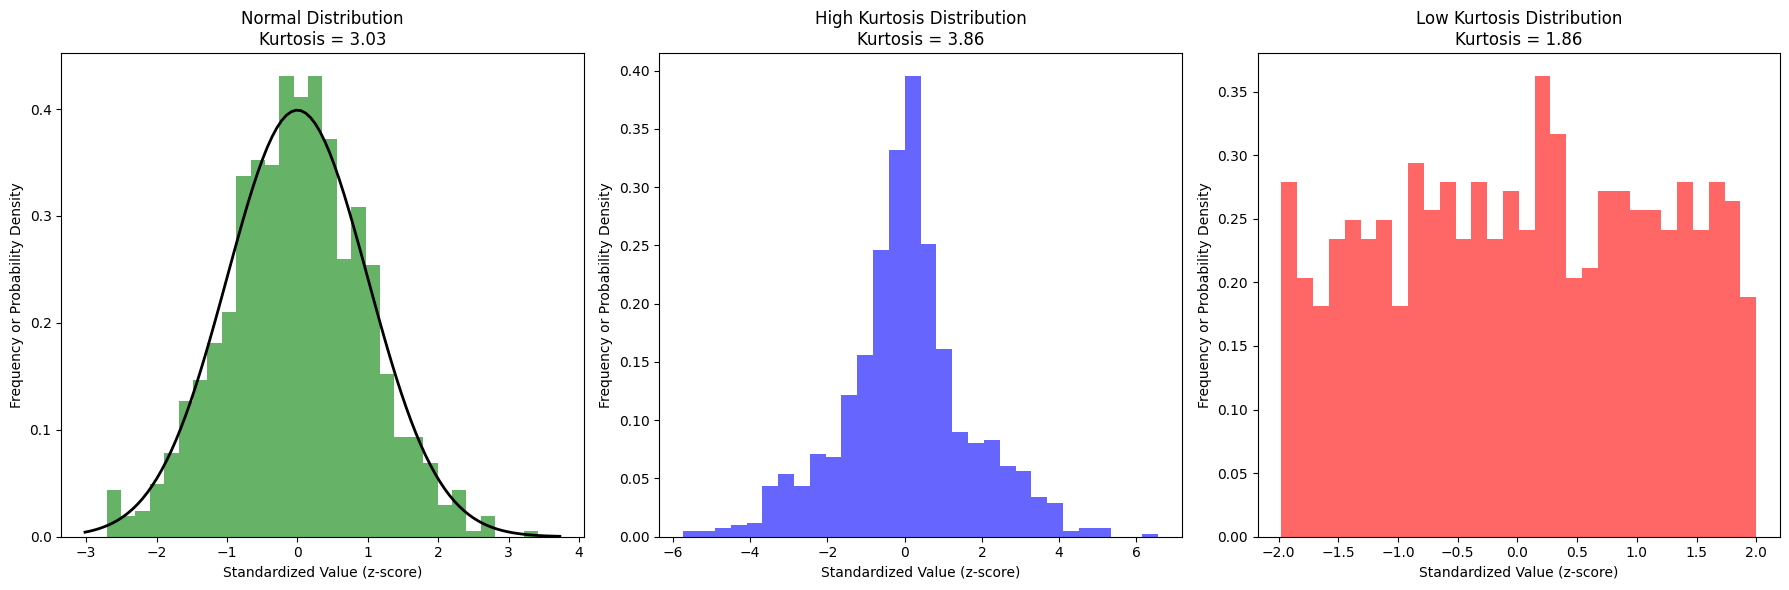

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, kurtosis

# 正态分布
data_normal = np.random.normal(0, 1, 1000)

# 高峰度分布
data_high_kurt = np.concatenate([np.random.normal(0, 0.5, 300), np.random.normal(0, 2, 700)])

# 低峰度分布
data_low_kurt = np.random.uniform(-2, 2, 1000)

# 计算峰度
kurt_normal = kurtosis(data_normal, fisher=False)
kurt_high = kurtosis(data_high_kurt, fisher=False)
kurt_low = kurtosis(data_low_kurt, fisher=False)

# 绘制图像
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))

# 正态分布
ax1.hist(data_normal, bins=30, density=True, alpha=0.6, color='g')
xmin, xmax = ax1.get_xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, 0, 1)
ax1.plot(x, p, 'k', linewidth=2)
ax1.set_title(f'Normal Distribution\nKurtosis = {kurt_normal:.2f}')
ax1.set_xlabel('Standardized Value (z-score)')
ax1.set_ylabel('Frequency or Probability Density')

# 高峰度分布
ax2.hist(data_high_kurt, bins=30, density=True, alpha=0.6, color='b')
ax2.set_title(f'High Kurtosis Distribution\nKurtosis = {kurt_high:.2f}')
ax2.set_xlabel('Standardized Value (z-score)')
ax2.set_ylabel('Frequency or Probability Density')

# 低峰度分布
ax3.hist(data_low_kurt, bins=30, density=True, alpha=0.6, color='r')
ax3.set_title(f'Low Kurtosis Distribution\nKurtosis = {kurt_low:.2f}')
ax3.set_xlabel('Standardized Value (z-score)')
ax3.set_ylabel('Frequency or Probability Density')

plt.tight_layout()
plt.show()


---

## 正态性检验的标准

| **指标** | **分类** | **描述** |
| --- | --- | --- |
| **偏度（Skewness）** | 数据分布的不对称性 | |
| **严重偏斜分布** | 1 < 偏度系数 或 偏度系数 < -1 | |
| **中度偏斜分布** | 0.5 < 偏度系数 < 1 或 -1 < 偏度系数 < -0.5 | |
| **轻微偏斜分布** | 0 < 偏度系数 < 0.5 或 -0.5 < 偏度系数 < 0 | |
| **负值** | 左偏分布（左长尾） | |
| **正值** | 右偏分布（右长尾） | |
| **峰度（Kurtosis）** | 数据分布的峰值高低 | |
| **非正态分布参考值** | 偏度 > 1；峰度 > 7 | |
| **标准正态分布** | 偏度 = 0；峰度 = 0 | |


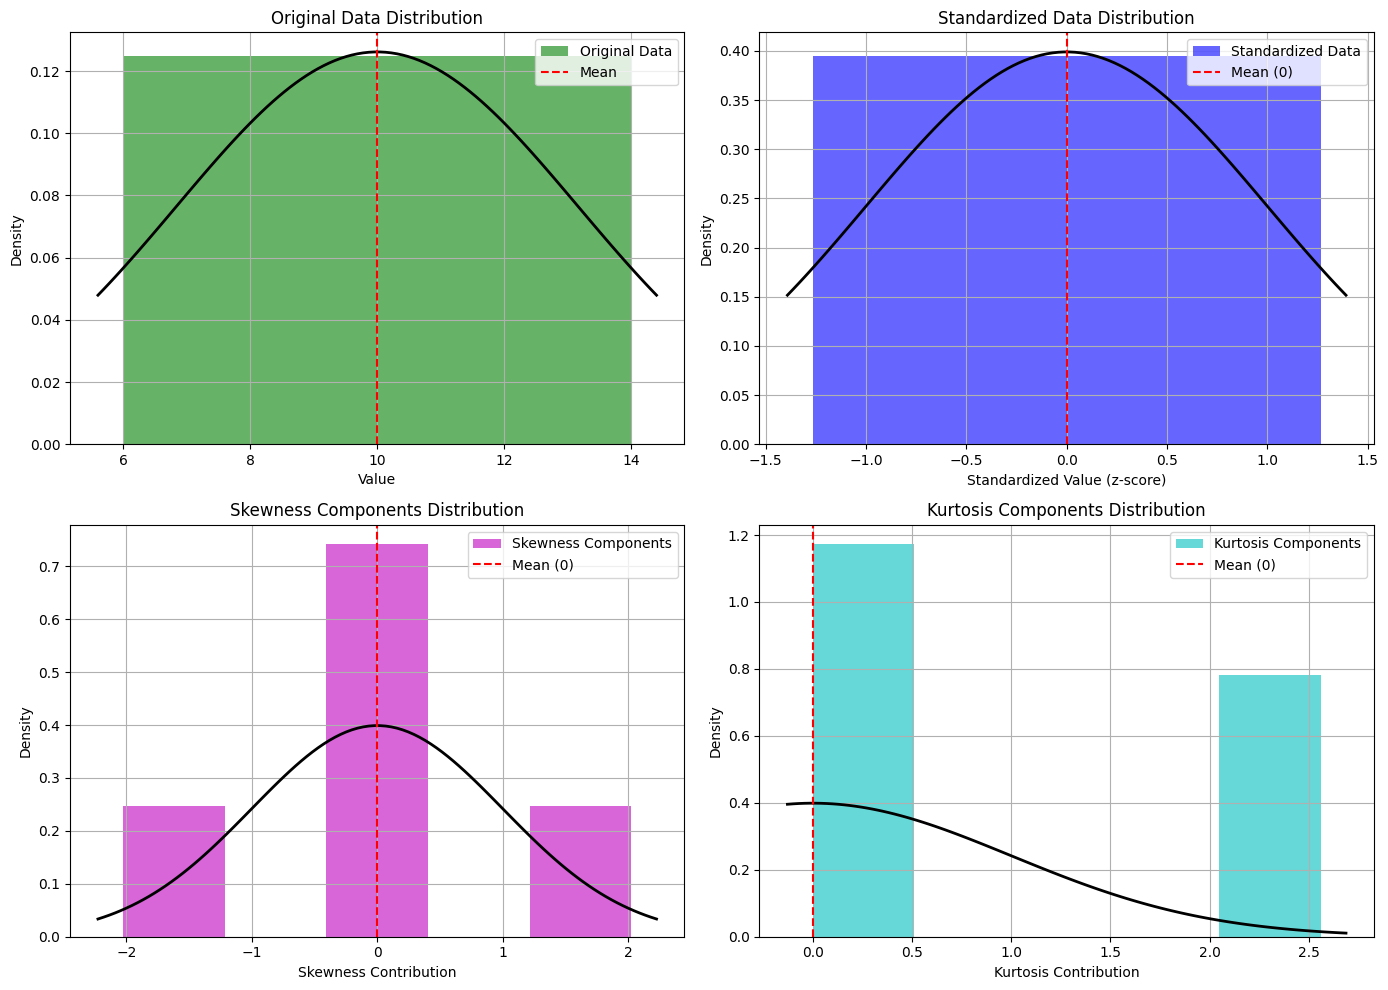

Skewness: 0.0000
Kurtosis: -1.9120


In [41]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# 给定数据
data = [6, 8, 10, 12, 14]

# 计算均值和标准差
mean = np.mean(data)
std_dev = np.std(data, ddof=1)

# 标准化数据（z-scores）
standardized_data = [(x - mean) / std_dev for x in data]

# 计算偏度的每一步
skewness_components = [((x - mean) / std_dev) ** 3 for x in data]
skewness = np.mean(skewness_components)

# 计算峰度的每一步
kurtosis_components = [((x - mean) / std_dev) ** 4 for x in data]
kurtosis = np.mean(kurtosis_components) - 3

# 创建子图
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# 原始数据分布图
axs[0, 0].hist(data, bins=5, density=True, alpha=0.6, color='g', label='Original Data')
xmin, xmax = axs[0, 0].get_xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mean, std_dev)
axs[0, 0].plot(x, p, 'k', linewidth=2)
axs[0, 0].axvline(mean, color='r', linestyle='--', label='Mean')
axs[0, 0].set_title('Original Data Distribution')
axs[0, 0].set_xlabel('Value')
axs[0, 0].set_ylabel('Density')
axs[0, 0].legend()
axs[0, 0].grid(True)

# 标准化数据分布图
axs[0, 1].hist(standardized_data, bins=5, density=True, alpha=0.6, color='b', label='Standardized Data')
xmin, xmax = axs[0, 1].get_xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, 0, 1)
axs[0, 1].plot(x, p, 'k', linewidth=2)
axs[0, 1].axvline(0, color='r', linestyle='--', label='Mean (0)')
axs[0, 1].set_title('Standardized Data Distribution')
axs[0, 1].set_xlabel('Standardized Value (z-score)')
axs[0, 1].set_ylabel('Density')
axs[0, 1].legend()
axs[0, 1].grid(True)

# 偏度每一步计算图
axs[1, 0].hist(skewness_components, bins=5, density=True, alpha=0.6, color='m', label='Skewness Components')
xmin, xmax = axs[1, 0].get_xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, 0, 1)
axs[1, 0].plot(x, p, 'k', linewidth=2)
axs[1, 0].axvline(0, color='r', linestyle='--', label='Mean (0)')
axs[1, 0].set_title('Skewness Components Distribution')
axs[1, 0].set_xlabel('Skewness Contribution')
axs[1, 0].set_ylabel('Density')
axs[1, 0].legend()
axs[1, 0].grid(True)

# 峰度每一步计算图
axs[1, 1].hist(kurtosis_components, bins=5, density=True, alpha=0.6, color='c', label='Kurtosis Components')
xmin, xmax = axs[1, 1].get_xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, 0, 1)
axs[1, 1].plot(x, p, 'k', linewidth=2)
axs[1, 1].axvline(0, color='r', linestyle='--', label='Mean (0)')
axs[1, 1].set_title('Kurtosis Components Distribution')
axs[1, 1].set_xlabel('Kurtosis Contribution')
axs[1, 1].set_ylabel('Density')
axs[1, 1].legend()
axs[1, 1].grid(True)

plt.tight_layout()
plt.show()

# 打印偏度和峰度值
print(f'Skewness: {skewness:.4f}')
print(f'Kurtosis: {kurtosis:.4f}')


在使用某种检验之前，确实需要确认数据是否符合该检验所要求的分布假设。这是确保检验结果有效性和准确性的关键步骤。以下是如何确认数据是否符合特定分布的概述：

### 1. T检验和Z检验
- **正态性假设**：T检验和Z检验都假设数据来自正态分布。
  - **方法**：
    - **绘图法**：绘制直方图、Q-Q图（Quantile-Quantile Plot）等。
    - **正态性检验**：使用Shapiro-Wilk检验、Kolmogorov-Smirnov检验等统计方法检验数据的正态性。
  - **适用情况**：
    - 小样本量：T检验。
    - 大样本量：Z检验。根据中心极限定理，大样本量下数据的样本均值分布近似正态分布。

### 2. F检验
- **正态性和方差齐性假设**：F检验假设数据来自正态分布且不同组的方差相等（齐性）。
  - **方法**：
    - **正态性检验**：同T检验和Z检验。
    - **方差齐性检验**：使用Levene检验、Bartlett检验等方法检验方差的齐性。
  - **适用情况**：
    - 数据来自正态分布且方差相等。

### 3. 卡方检验
- **频数数据假设**：卡方检验假设数据是分类数据且样本量足够大以确保期望频数不小于5。
  - **方法**：
    - **检查期望频数**：确保每个类别的期望频数至少为5。
  - **适用情况**：
    - 数据是分类数据且样本量足够大。

### 具体检验方法示例

#### 正态性检验示例
```python
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# 数据
data = [your_data_here]

# 绘制Q-Q图
stats.probplot(data, dist="norm", plot=plt)
plt.show()

# Shapiro-Wilk检验
shapiro_test = stats.shapiro(data)
print(f"Shapiro-Wilk test p-value: {shapiro_test.pvalue}")

# Kolmogorov-Smirnov检验
ks_test = stats.kstest(data, 'norm')
print(f"Kolmogorov-Smirnov test p-value: {ks_test.pvalue}")
```

#### 方差齐性检验示例
```python
import scipy.stats as stats

# 数据
group1 = [your_group1_data_here]
group2 = [your_group2_data_here]

# Levene检验
levene_test = stats.levene(group1, group2)
print(f"Levene's test p-value: {levene_test.pvalue}")

# Bartlett检验
bartlett_test = stats.bartlett(group1, group2)
print(f"Bartlett's test p-value: {bartlett_test.pvalue}")
```

### 结论
在进行T检验、Z检验、F检验或卡方检验之前，确认数据是否符合该检验所需的分布假设是非常重要的。通过使用上述的统计方法和绘图，可以验证数据的分布特性，从而确保所选检验方法的有效性。如果数据不符合这些假设，可以考虑进行数据转换或选择非参数检验方法。

四种分布（T分布、Z分布、F分布、卡方分布）分别对应不同的统计检验和分析方法，每种都有其代表性的分析方法。下面详细介绍这四种分布的代表性分析方法：

### 1. T分布（Student's T-distribution）
#### 代表性分析方法：
- **单样本T检验（One-sample T-test）**：
  - 用途：检验一个样本均值是否等于已知值。
  - 示例：检验某班级学生的平均成绩是否等于设定的标准分数。
  
- **独立样本T检验（Independent T-test）**：
  - 用途：比较两个独立样本的均值是否有显著差异。
  - 示例：比较男性和女性的平均身高是否有显著差异。
  
- **配对样本T检验（Paired T-test）**：
  - 用途：比较同一组受试者在不同时间点或不同条件下的均值差异。
  - 示例：比较某药物治疗前后患者的血压变化。
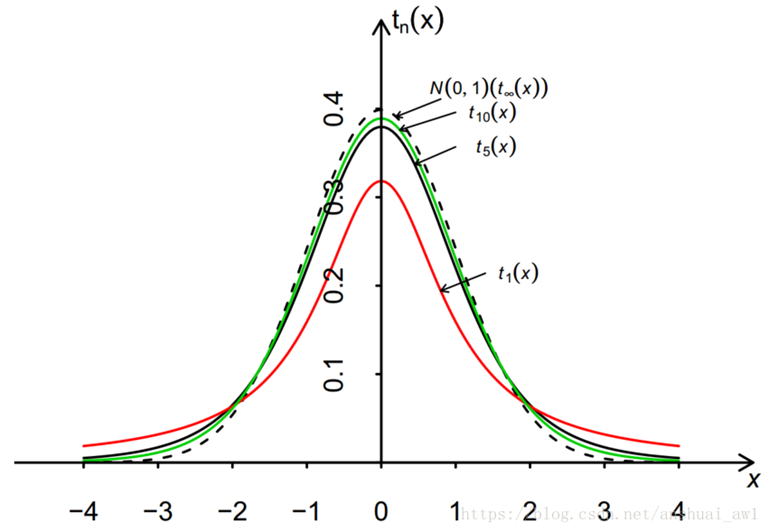
---
### 2. Z分布（Standard normal Distribution）
#### 代表性分析方法：
- **单样本Z检验（One-sample Z-test）**：
  - 用途：检验一个样本均值是否等于已知值，适用于大样本量。
  - 示例：检验一个工厂生产的零件平均长度是否等于目标值。
  
- **独立样本Z检验（Independent Z-test）**：
  - 用途：比较两个独立样本的均值或比例是否有显著差异，适用于大样本量。
  - 示例：比较两家工厂生产的零件合格率是否有显著差异。
  
- **比例Z检验（Proportion Z-test）**：
  - 用途：比较两个样本比例是否有显著差异，适用于大样本量。
  - 示例：比较两组不同治疗方法的治愈率是否有显著差异。
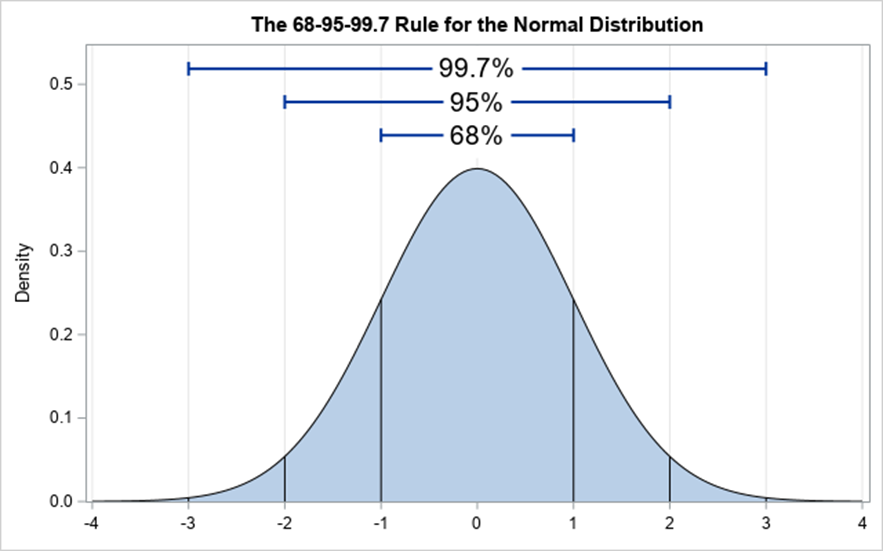
---
### 3. F分布（F-distribution）
#### 代表性分析方法：
- **单因素方差分析（One-way AnOVA）**：
  - 用途：比较多个组的均值是否有显著差异。
  - 示例：比较不同肥料对作物生长的影响是否有显著差异。
  
- **双因素方差分析（Two-way AnOVA）**：
  - 用途：同时比较两个因素对均值的影响及其交互作用。
  - 示例：研究不同教学方法和不同学习时间对学生成绩的影响。
  
- **F检验（F-test）**：
  - 用途：比较两个样本的方差是否有显著差异，常作为T检验的前提条件。
  - 示例：检验两种不同材料的拉伸强度的方差是否相等。
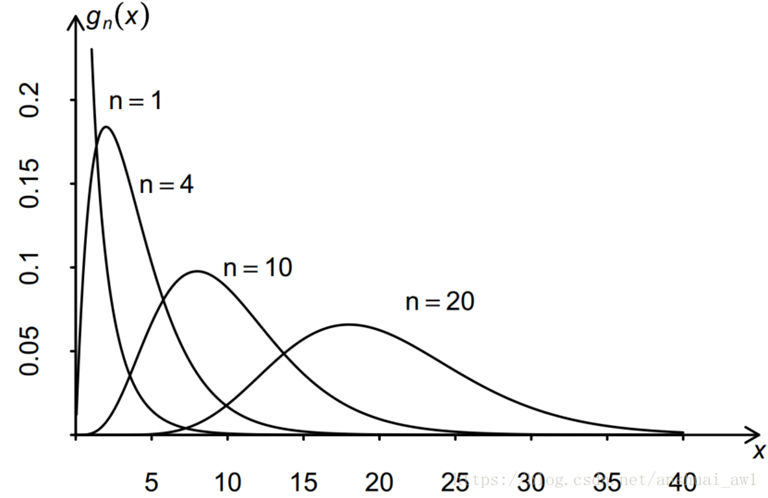
---
### 4. 卡方分布（Chi-square Distribution）
#### 代表性分析方法：
- **独立性检验（Chi-square Test for Independence）**：
  - 用途：检验两个分类变量是否独立。
  - 示例：检验性别和职业选择是否有独立性。
  
- **适配度检验（Chi-square Goodness of Fit Test）**：
  - 用途：检验观测数据是否符合某个预期分布。
  - 示例：检验一组骰子投掷结果是否符合均匀分布。
  
- **卡方检验（Chi-square Test）**：
  - 用途：用于频数数据的分析，适用于检验实际观察频数与理论预期频数的差异。
  - 示例：检验某城市不同地区的疾病发病率是否与总体分布一致。
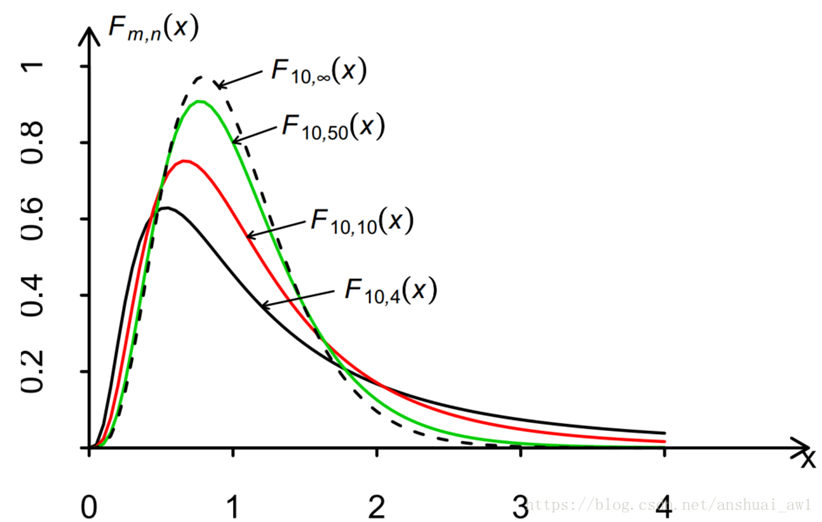
---
### 总结
- **T分布**：用于小样本均值比较，常见方法包括单样本T检验、独立样本T检验、配对样本T检验。
- **Z分布**：用于大样本均值或比例比较，常见方法包括单样本Z检验、独立样本Z检验、比例Z检验。
- **F分布**：用于方差分析，常见方法包括单因素方差分析、双因素方差分析、F检验。
- **卡方分布**：用于频数数据分析，常见方法包括独立性检验、适配度检验、卡方检验。

这些代表性分析方法在不同的研究和数据分析中广泛应用，选择适当的方法可以确保分析结果的准确性和可靠性。

- 中心极限定理：只要n自由度充分大，样本就趋于正态分布。
- 伽尔顿板仿真： http://vr.1zhidian.cn/bean/
- 正态分布仿真： https://www.randomservices.org/random/apps/SpecialSimulator.html


以下是T检验、Z检验、F检验和卡方检验的公式及其相关参数：

### 1. T检验公式

#### 单样本T检验（One-sample T-test）
$$ t = \frac{\bar{X} - \mu}{\frac{s}{\sqrt{n}}} $$
- $\bar{X}$：样本均值
- $\mu$：总体均值
- $s$：样本标准差
- $n$：样本量

#### 独立样本T检验（Independent T-test）
$$ t = \frac{\bar{X}_1 - \bar{X}_2}{\sqrt{\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2}}} $$
- $\bar{X}_1, \bar{X}_2$：两个独立样本的均值
- $s_1^2, s_2^2$：两个独立样本的方差
- $n_1, n_2$：两个独立样本的样本量

#### 配对样本T检验（Paired T-test）
$$ t = \frac{\bar{D}}{\frac{s_D}{\sqrt{n}}} $$
- $\bar{D}$：配对差值的均值
- $s_D$：配对差值的标准差
- $n$：配对样本量

### 2. Z检验公式

#### 单样本Z检验（One-sample Z-test）
$$ z = \frac{\bar{X} - \mu}{\frac{\sigma}{\sqrt{n}}} $$
- $\bar{X}$：样本均值
- $\mu$：总体均值
- $\sigma$：总体标准差
- $n$：样本量

#### 独立样本Z检验（Independent Z-test）
$$ z = \frac{\bar{X}_1 - \bar{X}_2}{\sqrt{\frac{\sigma_1^2}{n_1} + \frac{\sigma_2^2}{n_2}}} $$
- $\bar{X}_1, \bar{X}_2$：两个独立样本的均值
- $\sigma_1^2, \sigma_2^2$：两个独立样本的总体方差
- $n_1, n_2$：两个独立样本的样本量

#### 比例Z检验（Proportion Z-test）
$$ z = \frac{p_1 - p_2}{\sqrt{p(1 - p)\left(\frac{1}{n_1} + \frac{1}{n_2}\right)}} $$
- $p_1, p_2$：两个样本的比例
- $p$：合并后的总体比例
- $n_1, $n_2$：两个样本的样本量

### 3. F检验公式

#### 单因素方差分析（One-way AnOVA）
$$ F = \frac{MS_{\text{between}}}{MS_{\text{within}}} $$
- $MS_{\text{between}} = \frac{SS_{\text{between}}}{df_{\text{between}}}$：组间均方
- $MS_{\text{within}} = \frac{SS_{\text{within}}}{df_{\text{within}}}$：组内均方
- $SS_{\text{between}}$：组间平方和
- $SS_{\text{within}}$：组内平方和
- $df_{\text{between}}$：组间自由度
- $df_{\text{within}}$：组内自由度

自由度：数据中可以自由变动的元素数量。  
$$ df=n−1 $$


### 4. 卡方检验公式

#### 独立性检验和适配度检验（Chi-square Test）
$$ \chi^2 = \sum \frac{(O_i - E_i)^2}{E_i} $$
- $O_i$：观测频数
- $E_i$：期望频数

这些公式是统计检验的基础，用于计算检验统计量，从而进行假设检验和数据分析。了解这些公式及其参数对于正确使用统计检验方法至关重要。

自由度（Degrees of Freedom，df）是统计学中的一个重要概念，指的是在计算某个统计量时，独立可变的数据点的数量。自由度的数量通常等于样本量减去某些限制条件的数量。直观理解自由度可以帮助我们更好地理解统计检验和模型的复杂性。

### 直观理解自由度

#### 1. 自由度的基本概念
自由度可以理解为数据中可以自由变动的元素数量。在进行统计计算时，某些参数可能受到约束，减少了可自由变动的数值数量。自由度衡量了在计算过程中有多少数值是自由独立的。

#### 2. 直观例子
假设你有一组数据，其中包含5个数的样本，它们的总和必须是已知的。例如，这5个数的总和是50。你可以自由选择前4个数，但第5个数必须是50减去前4个数的和。因此，只有4个数是自由变动的，第5个数是由前4个数确定的。这时，自由度为4。

### 自由度在统计检验中的应用

#### 1. T检验
对于单样本T检验，自由度等于样本量减去1，因为我们需要估计样本的均值，这就消耗了一个自由度。

公式：
$$ df = n - 1 $$

#### 2. F检验
在方差分析（AnOVA）中，自由度分为组间自由度和组内自由度。组间自由度与组的数量相关，而组内自由度与总样本量和组的数量相关。

- 组间自由度：
$$ df_{\text{between}} = k - 1 $$
  其中，$k$是组的数量。
- 组内自由度：
$$ df_{\text{within}} = n - k $$
  其中，$n$是总样本量。

#### 3. 卡方检验
卡方检验中，自由度与分类变量的类别数相关。对于适配度检验，自由度等于类别数减去1。

公式：
$$ df = k - 1 $$
  其中，$k$是类别数。

对于独立性检验，自由度等于（行数减1）乘以（列数减1）。

公式：
$$ df = (r - 1) \times (c - 1) $$
  其中，$r$是行数，$c$是列数。

### 自由度的重要性

1. **计算检验统计量**：自由度影响统计检验的分布形状和临界值。例如，T分布和卡方分布的形状取决于自由度。
2. **估计参数**：自由度反映了模型的复杂性。自由度越高，模型能够更灵活地拟合数据。
3. **解释结果**：了解自由度可以帮助解释统计结果的可靠性和精确度。

### 总结
自由度是统计学中用来衡量独立可变动数据点数量的概念。通过具体例子和在不同检验中的应用，自由度可以帮助我们理解统计检验的基本原理、结果的可靠性以及模型的复杂性。自由度的理解不仅在计算统计量时至关重要，而且在解释和应用统计结果时同样重要。

抽样分布（Sampling Distribution）是描述从总体中抽取的样本统计量的分布情况的概念。理解抽样分布是进行参数估计和假设检验的基础。以下是构建和理解抽样分布的步骤：

### 抽样分布的步骤

1. **定义总体**
   - 明确总体的特性和分布情况，例如总体均值（$\mu$）和总体标准差（$\sigma$）。

2. **确定样本量**
   - 决定每次抽样的样本大小（$n$）。

3. **随机抽样**
   - 从总体中随机抽取多个样本，每个样本的大小为$n$。
   - 例如，重复抽取$k$次样本，每个样本包含$n$个观测值。

4. **计算样本统计量**
   - 对每个抽取的样本计算感兴趣的统计量（例如样本均值$\bar{X}$、样本比例$\hat{p}$、样本方差$s^2$等）。
   - 记录每个样本的统计量值。

5. **构建抽样分布**
   - 将所有样本统计量绘制在同一个图上，形成统计量的分布。
   - 例如，绘制样本均值的频率分布图或直方图，得到样本均值的抽样分布。

6. **分析抽样分布的特性**
   - 计算抽样分布的均值、标准误差等。
   - 根据大数定律和中心极限定理，理解抽样分布的特性：
     - 样本均值的抽样分布均值为总体均值$\mu$。
     - 样本均值的抽样分布的标准误差为$\frac{\sigma}{\sqrt{n}}$。
     - 当样本量足够大时，样本均值的抽样分布近似正态分布。

### 具体步骤示例

假设我们有一个总体，想要研究其样本均值的抽样分布：

#### 步骤1：定义总体
- 总体均值$\mu = 50$
- 总体标准差$\sigma = 10$
- 总体分布假设为正态分布

#### 步骤2：确定样本量
- 每个样本大小$n = 30$

#### 步骤3：随机抽样
- 从总体中随机抽取1000个样本，每个样本包含30个观测值。

#### 步骤4：计算样本统计量
- 对每个样本计算样本均值$\bar{X}$。
- 记录1000个样本均值。

#### 步骤5：构建抽样分布
- 绘制1000个样本均值的直方图，形成样本均值的抽样分布。

#### 步骤6：分析抽样分布的特性
- 计算抽样分布的均值：
  $$
  \text{Mean of Sampling Distribution} = \mu = 50
  $$
- 计算抽样分布的标准误差：
  $$
  \text{Standard Error} = \frac{\sigma}{\sqrt{n}} = \frac{10}{\sqrt{30}} \approx 1.83
  $$
- 验证抽样分布是否近似正态分布。

### 总结

1. **定义总体**：明确总体的特性和分布。
2. **确定样本量**：决定每次抽样的样本大小。
3. **随机抽样**：从总体中多次抽取样本。
4. **计算样本统计量**：对每个样本计算所需的统计量。
5. **构建抽样分布**：绘制统计量的分布图。
6. **分析抽样分布的特性**：计算抽样分布的均值和标准误差，并理解其特性。

通过这些步骤，可以直观理解抽样分布的形成过程及其在统计推断中的重要性。

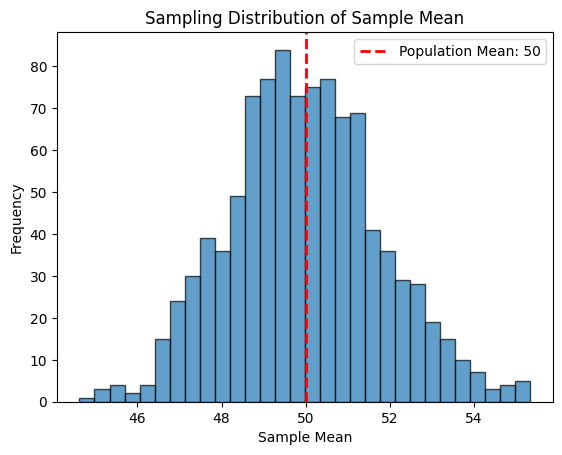

Mean of Sampling Distribution: 49.96543257505039
Standard Error: 1.7959956598557438


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 定义总体参数
mu = 50
sigma = 10
population = np.random.normal(mu, sigma, 1000000)  # 模拟一个大的总体

# 确定样本量和抽样次数
n = 30
num_samples = 1000

# 进行随机抽样并计算样本均值
sample_means = []
for _ in range(num_samples):
    sample = np.random.choice(population, n, replace=False)
    sample_means.append(np.mean(sample))

# 构建抽样分布
plt.hist(sample_means, bins=30, edgecolor='k', alpha=0.7)
plt.title('Sampling Distribution of Sample Mean')
plt.xlabel('Sample Mean')
plt.ylabel('Frequency')
plt.axvline(mu, color='red', linestyle='dashed', linewidth=2, label=f'Population Mean: {mu}')
plt.legend()
plt.show()

# 计算抽样分布的均值和标准误差
mean_of_sampling_distribution = np.mean(sample_means)
standard_error = np.std(sample_means)
print(f'Mean of Sampling Distribution: {mean_of_sampling_distribution}')
print(f'Standard Error: {standard_error}')